#**Project P437: Customer Targeting: Predicting Term Deposit Subscriptions in Bank Marketing**

# Table of Contents:

1.[Introduction](https://)

  *   [Problem Statement](https://)
  *   [About Project](https://)
  *   [Objectives of project](https://)

2.[Prepare Data for Consumption](https://)


  *   [Import Libraries](https://)
  *   [Meet and Greet Data](https://)



  *   [Data Cleaning](https://)


3.[Data Visualization](https://)


  *   [Correlation plot of attributes](https://)

4.[Feature Engineering](https://)

  *   [Handling Outliers](https://)

  *   [Encoding](https://)

  *   [Standardization of numerical variables](https://)
  *   [Feature Selection](https://)
  *   [Inference EDA](https://)


  *   [Train and Test Split (80:20)](https://)

5.[Modelling our Data](https://)


  *   [Logistic regression](https://)

  *   [Decision Tree](https://)

  *   [Random Forest](https://)

  *   [XGBoost](https://)

  *   [LightGBM](https://)

  *   [Neural Networks(MLP)](https://)

  *   [Hyperparameter tuning and cross validation](https://)


6.[Evaluation](https://)

7.[Interpretation](https://)

8.[Depolyment](https://)

9.[Conclusion](https://)

###**Business Objective:**

The goal is to develop a predictive model to classify whether a client will subscribe to a term deposit based on demographic, socio-economic, and campaign-related factors.

The data file contains 41118 customers information and 21 columns



####**Variable Descriptions**
1.	**age:** (Numeric) Age of the client.
2.	**job:** (Categorical) Type of job (e.g., admin, technician, blue-collar, etc.).
3.	**marital:** (Categorical) Marital status (e.g., married, single, divorced).
4.	**education:** (Categorical) Education level of the client (e.g., primary, secondary, tertiary, unknown).
5.	**default:** (Binary) Whether the client has credit in default (yes/no).
6.	**housing:** (Binary) Whether the client has a housing loan (yes/no).
7.	**loan:** (Binary) Whether the client has a personal loan (yes/no).
8.	**contact:** (Categorical) Contact communication type (e.g., cellular, telephone).
9.	**month:** (Categorical) Last contact month of the year (e.g., January, February).
10.	**day_of_week:** (Categorical) Last contact day of the week (e.g., Monday, Tuesday).
11.	**duration:** (Numeric) Last contact duration, in seconds. Note: This feature is highly predictive but should be handled carefully in predictive modelling.
12.	**campaign:** (Numeric) Number of contacts performed during this campaign and for this client (includes the last contact).
13.	**pdays:** (Numeric) Number of days since the client was last contacted from a previous campaign. -1 means the client was not previously contacted.
14.	**previous:** (Numeric) Number of contacts performed before this campaign and for this client.
15.	**poutcome:** (Categorical) Outcome of the previous marketing campaign (e.g., success, failure, unknown, non-existent).
16.	**emp_var_rate:** (Numeric) Employment variation rate (quarterly indicator).
17.	**cons_price_idx:** (Numeric) Consumer price index (monthly indicator).
18.	**cons_conf_idx:** (Numeric) Consumer confidence index (monthly indicator).
19.	**euribor3m:** (Numeric) Euribor 3-month rate.
20.	**nr_employed:** (Numeric) Number of employees (quarterly indicator).
21.	**y:** (Binary) Target variable indicating whether the client subscribed to a term deposit (yes/no).


### **Problem Statement:**
Using the provided data, develop a classification model that predicts whether a client will subscribe to a term deposit (yes/no) based on personal characteristics, contact details, and economic indicators. This model can help the bank improve its marketing strategy by identifying the characteristics of clients who are likely to respond positively to marketing campaigns, thereby enhancing campaign effectiveness and customer acquisition.

**Acceptance Criterion:**
Need to deploy the end results using Flask /Streamlit.etc.



In [ ]:
#Memory Usage in this dataset
import psutil
print(f"RAM: {psutil.virtual_memory()}")
print(f"Disk: {psutil.disk_usage('/')}")

RAM: svmem(total=13609431040, available=12394246144, percent=8.9, used=880087040, free=7559794688, active=661377024, inactive=4983894016, buffers=309723136, cached=4859826176, shared=1794048, slab=239460352)
Disk: sdiskusage(total=120942624768, used=45289820160, free=75636027392, percent=37.5)


#**Initial Observations:**
1. ### **Demographic & Socio-economic Factors:**
- **age:** Integer
- **job:** Categorical (e.g., "blue-collar", "technician", "management")
- **marital:** Categorical (e.g., "married", "single")
- **education:** Categorical (e.g., "basic.4y", "university.degree")
- **default, housing, loan:** Categorical (e.g., "yes", "no", "unknown")

2. ### **Campaign-related Factors:**
- **contact:** Categorical (e.g., "cellular", "telephone")
- **month, day_of_week:** Categorical (e.g., "aug", "thu")
- **duration, campaign, pdays, previous:** Numeric

3. ### **Economic Indicators:**
- **emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed:** Numeric


#Part- 1

###**Step 1: Data Exploration**

**1. Load the dataset and perform exploratory data analysis (EDA)**

In [ ]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder


from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load banking dataset
data_fd = pd.read_csv("/content/drive/MyDrive/banking.csv")
#First few rows
data_fd.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
#Number of columns in the dataset
data_fd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [ ]:
#Datatypes of the columns
data_fd.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


**Dataset Structure:**
- Numerical Features: 11 columns (int64, float64)
- Categorical Features: 10 columns (object)

In [ ]:
#Typcasting
# Convert categorical columns to the 'category' data type
categorical_features = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']
# Typecasting categorical columns
for feature in categorical_features:
    data_fd[feature] = data_fd[feature].astype('category')

In [ ]:
# Convert the target variable 'y' to category as well
data_fd['y'] = data_fd['y'].astype('category')

In [ ]:
#Number of rows and columns
data_fd.shape

(41188, 21)

**The data file contains 41118 customers information and 21 columns**

In [ ]:
#Info of dataset
data_fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp_var_rate    41188 non-null  float64 
 16  cons_price_idx  41188 non-null  float64 
 17  cons_conf_id

### **Step 2:Data Preprocessing**

In [ ]:
#To check for missing values
data_fd.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


**No missing values**

In [ ]:
# Check for NaN values in the entire dataset
nan_summary = data_fd.isna().sum()

# Display the columns that have NaN values
nan_summary = nan_summary[nan_summary > 0]

print("Columns with NaN values:")
print(nan_summary)


Columns with NaN values:
Series([], dtype: int64)


**No columns with NaN values**

In [ ]:
#Summary statistics
data_fd.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- **Age:** The average age is around 40 years, with a range from 17 to 98 years.
Duration: Call duration varies widely, with a mean of 258 seconds and a maximum of 4918 seconds.
- **Campaign:** Number of contacts made during the current campaign, with a median of 2 contacts.
- **Pdays:** The number of days that passed after the client was last contacted from a previous campaign, where 999 indicates the client was not previously contacted.
- **Emp_var_rate, Cons_price_idx, Cons_conf_idx, Euribor3m, Nr_employed:** Various economic indicators with different ranges.

####**2.1 Univariate Numerical variable analysis**

In [ ]:
#numerical columns in dataset
df_fd_numerical = data_fd.select_dtypes(include=['int64', 'float64'])
df_fd_numerical.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2


In [ ]:
#numerical data mean and median
df_fd_numerical.mean(),df_fd_numerical.median()

(age                 40.024060
 duration           258.285010
 campaign             2.567593
 pdays              962.475454
 previous             0.172963
 emp_var_rate         0.081886
 cons_price_idx      93.575664
 cons_conf_idx      -40.502600
 euribor3m            3.621291
 nr_employed       5167.035911
 dtype: float64,
 age                 38.000
 duration           180.000
 campaign             2.000
 pdays              999.000
 previous             0.000
 emp_var_rate         1.100
 cons_price_idx      93.749
 cons_conf_idx      -41.800
 euribor3m            4.857
 nr_employed       5191.000
 dtype: float64)

In [ ]:
for col in df_fd_numerical.columns:
      print("range of {}{}{}{}{}{}{}{}".format(col,":"," ","[",df_fd_numerical[col].min(), ", ",df_fd_numerical[col].max(),"]"))

range of age: [17, 98]
range of duration: [0, 4918]
range of campaign: [1, 56]
range of pdays: [0, 999]
range of previous: [0, 7]
range of emp_var_rate: [-3.4, 1.4]
range of cons_price_idx: [92.201, 94.767]
range of cons_conf_idx: [-50.8, -26.9]
range of euribor3m: [0.634, 5.045]
range of nr_employed: [4963.6, 5228.1]


In [ ]:
for col in df_fd_numerical.columns:
      print("Standard deviation and varince of {}{}{}{}{}{}{}{}".format(col,":"," ","[",df_fd_numerical[col].std(), ", ",df_fd_numerical[col].var(),"]"))

Standard deviation and varince of age: [10.421249980934048, 108.60245116511788]
Standard deviation and varince of duration: [259.2792488364648, 67225.72887720143]
Standard deviation and varince of campaign: [2.770013542902328, 7.672975027862306]
Standard deviation and varince of pdays: [186.91090734474176, 34935.68728443464]
Standard deviation and varince of previous: [0.4949010798392897, 0.244927078826095]
Standard deviation and varince of emp_var_rate: [1.5709597405170255, 2.4679145063253203]
Standard deviation and varince of cons_price_idx: [0.5788400489541262, 0.3350558022732152]
Standard deviation and varince of cons_conf_idx: [4.628197856174544, 21.42021539589864]
Standard deviation and varince of euribor3m: [1.7344474048512668, 3.0083078001952943]
Standard deviation and varince of nr_employed: [72.25152766826108, 5220.283250397495]


In [ ]:
for col in df_fd_numerical.columns:
      print("Kurtosis and Skewness of {}{}{}{}{}{}{}{}".format(col,":"," ","[",df_fd_numerical[col].kurt(), ", ",df_fd_numerical[col].skew(),"]"))

Kurtosis and Skewness of age: [0.7913115311544332, 0.7846968157646645]
Kurtosis and Skewness of duration: [20.24793801497879, 3.2631412552628314]
Kurtosis and Skewness of campaign: [36.979795142898844, 4.762506697067007]
Kurtosis and Skewness of pdays: [22.229462626355353, -4.922189916418164]
Kurtosis and Skewness of previous: [20.108816215208236, 3.8320422428611836]
Kurtosis and Skewness of emp_var_rate: [-1.0626315246508395, -0.7240955492472559]
Kurtosis and Skewness of cons_price_idx: [-0.8298085771833641, -0.2308876513578066]
Kurtosis and Skewness of cons_conf_idx: [-0.35855831054052567, 0.3031798587481924]
Kurtosis and Skewness of euribor3m: [-1.406802622387499, -0.7091879563778299]
Kurtosis and Skewness of nr_employed: [-0.0037603756956317014, -1.044262407089151]


In [ ]:
#Detecting Outliers
outliers = {}

for col in df_fd_numerical: # Iterate over the Index object directly
    Q1 = np.quantile(df_fd_numerical[col], 0.25)
    Q3 = np.quantile(df_fd_numerical[col], 0.75)
    IQR = (Q3 - Q1)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_fd_numerical[(df_fd_numerical[col] < lower_bound) | (df_fd_numerical[col] > upper_bound)][col]

# Print the outliers
for col, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {col}:\n{values}\n")
    else:
        print(f"No outliers in {col}\n")

Outliers in age:
43       72
307      74
334      80
454      72
559      75
         ..
40901    88
40905    76
40906    75
41001    82
41123    80
Name: age, Length: 469, dtype: int64

Outliers in duration:
11        789
14       1021
16       1034
21       1114
28        746
         ... 
41115    1111
41130    1111
41162     902
41171     956
41172    1309
Name: duration, Length: 2963, dtype: int64

Outliers in campaign:
5         8
38       25
39       11
59       12
75       18
         ..
41007    11
41020    12
41048     8
41064     8
41069     8
Name: campaign, Length: 2406, dtype: int64

Outliers in pdays:
2        6
4        3
8        3
27       2
71       4
        ..
40991    3
41001    3
41078    6
41111    6
41135    3
Name: pdays, Length: 1515, dtype: int64

Outliers in previous:
2        2
4        1
8        1
9        1
20       1
        ..
41135    2
41150    1
41151    1
41153    1
41182    1
Name: previous, Length: 5625, dtype: int64

No outliers in emp_var_rate

No outliers were detected in:
-	emp_var_rate
-	cons_price_idx
-	euribor3m
-	nr_employed


In [ ]:
'''
Age: Caps ages greater than 72 to 72.
Duration: Applied a log transformation to reduce the skewness.
Campaign: Capped the campaign feature at its 95th percentile.
Pdays: Imputted using max() value"
Previous: Bins the previous contacts into categories (No Contact, 1-2, 3-5, and 5+).
Cons_conf_idx: Caps extreme negative values at the 5th percentile.
'''
#Treating outliers
def treat_outliers(df):
    # 1. Age: Cap at 72
    df['age'] = np.where(df['age'] > 72, 72, df['age'])

    # 2. Duration: Log transformation
    df['duration'] = np.log(df['duration'] + 1)  # Adding 1 to avoid log(0)

    # 3. Campaign: Cap at the 95th percentile
    campaign_cap = df['campaign'].quantile(0.95)
    df['campaign'] = np.where(df['campaign'] > campaign_cap, campaign_cap, df['campaign'])

    # Avoided : 4. Pdays: Create a new category for 999 and bin the rest
    #df['pdays_new'] = np.where(df['pdays'] == 999, 'Not Contacted', 'Contacted')


    # 4. Pdays: Impute using the max() value of pdays
    df['pdays'] = np.where(df['pdays'] == 999, df['pdays'].max(), df['pdays'])


    # 5. Previous: Binning into categories
    # Convert the 'previous' column to numeric type before applying pd.cut
    df['previous'] = pd.to_numeric(df['previous'], errors='coerce')
    df['previous'] = pd.cut(df['previous'], bins=[-1, 0, 2, 5, np.inf], labels=['No Contact', '1-2', '3-5', '5+'])

    # 6. Cons_conf_idx: Cap at the 5th percentile
    cons_conf_cap = df['cons_conf_idx'].quantile(0.05)
    df['cons_conf_idx'] = np.where(df['cons_conf_idx'] < cons_conf_cap, cons_conf_cap, df['cons_conf_idx'])

    return df

In [ ]:
# Apply the function to banking dataset
data_cleaned = treat_outliers(data_fd)

# Verify the results
print(data_cleaned[['age', 'duration', 'campaign', 'pdays', 'previous', 'cons_conf_idx']].head())

   age  duration  campaign  pdays    previous  cons_conf_idx
0   44  5.351858       1.0    999  No Contact          -36.1
1   53  4.934474       1.0    999  No Contact          -42.0
2   28  5.828946       3.0      6         1-2          -39.8
3   39  5.225747       2.0    999  No Contact          -47.1
4   55  4.927254       1.0      3         1-2          -31.4


In [ ]:
#correlation of numerical cols
df_num = data_cleaned.corr(numeric_only=True)
df_num

,age,duration,campaign,pdays,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,0.007229,0.002914,-0.028713,0.008338,0.004870,0.130484,0.020058,-0.006974
duration,0.007229,1.000000,-0.164173,-0.076478,-0.044039,-0.009365,0.028735,-0.045387,-0.066444
campaign,0.002914,-0.164173,1.000000,0.059958,0.151522,0.117373,-0.019852,0.132472,0.145483
pdays,-0.028713,-0.076478,0.059958,1.000000,0.271004,0.078889,-0.101529,0.296899,0.372605
emp_var_rate,0.008338,-0.044039,0.151522,0.271004,1.000000,0.775334,0.190240,0.972245,0.906970
cons_price_idx,0.004870,-0.009365,0.117373,0.078889,0.775334,1.000000,0.064280,0.688230,0.522034
cons_conf_idx,0.130484,0.028735,-0.019852,-0.101529,0.190240,0.064280,1.000000,0.269668,0.083632
euribor3m,0.020058,-0.045387,0.132472,0.296899,0.972245,0.688230,0.269668,1.000000,0.945154
nr_employed,-0.006974,-0.066444,0.145483,0.372605,0.906970,0.522034,0.083632,0.945154,1.000000


**Visualization**

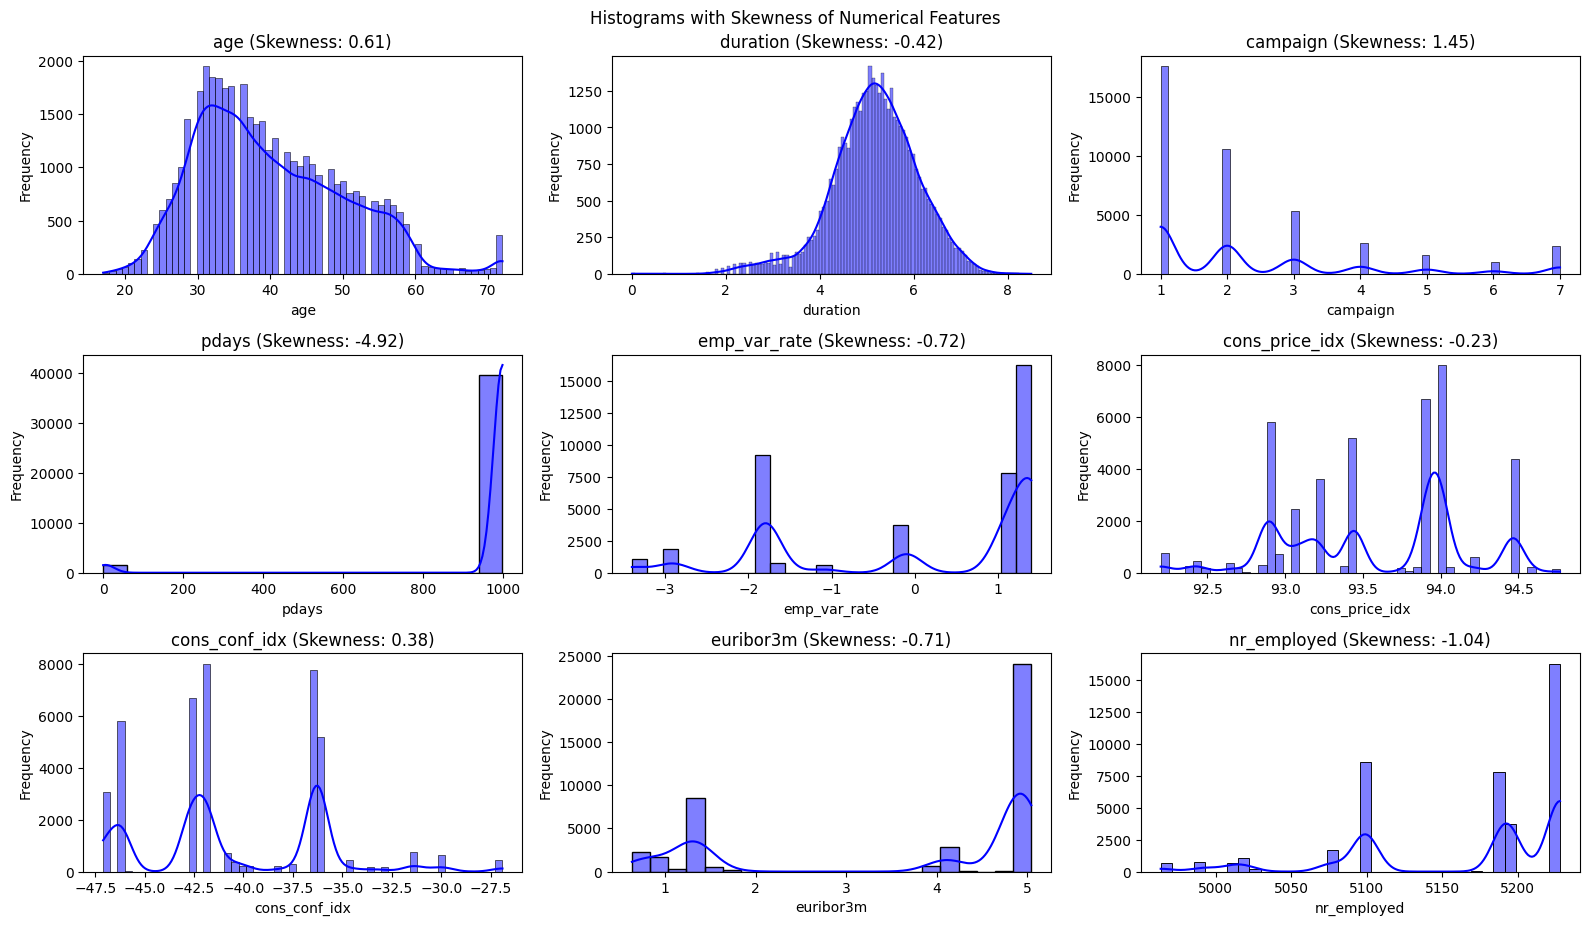

In [ ]:
#Histogram plot of numerical columns
# Set up the figure and axes
plt.figure(figsize=(16, 12))
# Loop through each numerical feature to plot its histogram
for i, col in enumerate(df_num):
    plt.subplot(4, 3, i+1)  # Adjust the number of rows and columns based on the number of features
    sns.histplot(data_fd[col], kde=True, color='blue', edgecolor='black')
    plt.title(f'{col} (Skewness: {data_fd[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Histograms with Skewness of Numerical Features')
plt.tight_layout()
plt.show()

1. **Age:**
- **Skewness: 0.61 (Moderately right-skewed)**.The distribution is slightly skewed to the right, with a majority of the clients between 30 and 60 years old. The cap at 72 seems to have moderated the extreme outliers, but the skewness suggests a potential for further normalization if needed.
2. **Duration:**
- **Skewness: -0.42 (Slightly left-skewed)**.After log transformation, the duration is more symmetric. The transformation has effectively reduced the impact of long call durations, making the distribution more normal-like.
3. **Campaign:**
- **Skewness: 1.45 (Right-skewed)**.The campaign feature remains right-skewed even after capping. Most clients were contacted only a few times, with a tail for higher contacts. The skewness indicates that extreme values are still present, but they are now controlled.
4. **Pdays:**
- **Skewness: -4.92 (Highly left-skewed)**.The extreme skewness is due to the large number of clients who were not contacted in previous campaigns (represented by 999). This suggests that the distribution is highly imbalanced, and separating these cases into a different category was a good approach.
5. **Emp_var_rate:**
- **Skewness: -0.72 (Moderately left-skewed)**.The employment variation rate shows a somewhat left-skewed distribution, indicating that lower employment variation rates are more frequent.
6. **Cons_price_idx:**
- **Skewness: -0.23 (Nearly symmetric)**.The consumer price index is nearly symmetric, with minor deviations. No significant skewness is observed, indicating a relatively balanced distribution.
7. **Cons_conf_idx:**
- **Skewness: 0.38 (Slightly right-skewed)**.The consumer confidence index has a slight right skew, with several peaks, indicating different economic conditions. The capping of extreme negative values has moderated the distribution.
8. **Euribor3m:**
- **Skewness: -0.71 (Moderately left-skewed)**.The Euribor 3-month rate is moderately left-skewed, suggesting that lower interest rates are more common. The distribution is multimodal, reflecting various economic conditions over time.
9. **Nr_employed:**
- **Skewness: -1.04 (Left-skewed)**.The number of employed persons is left-skewed, with a higher frequency of lower values. This may indicate the effect of economic conditions where employment was relatively low.

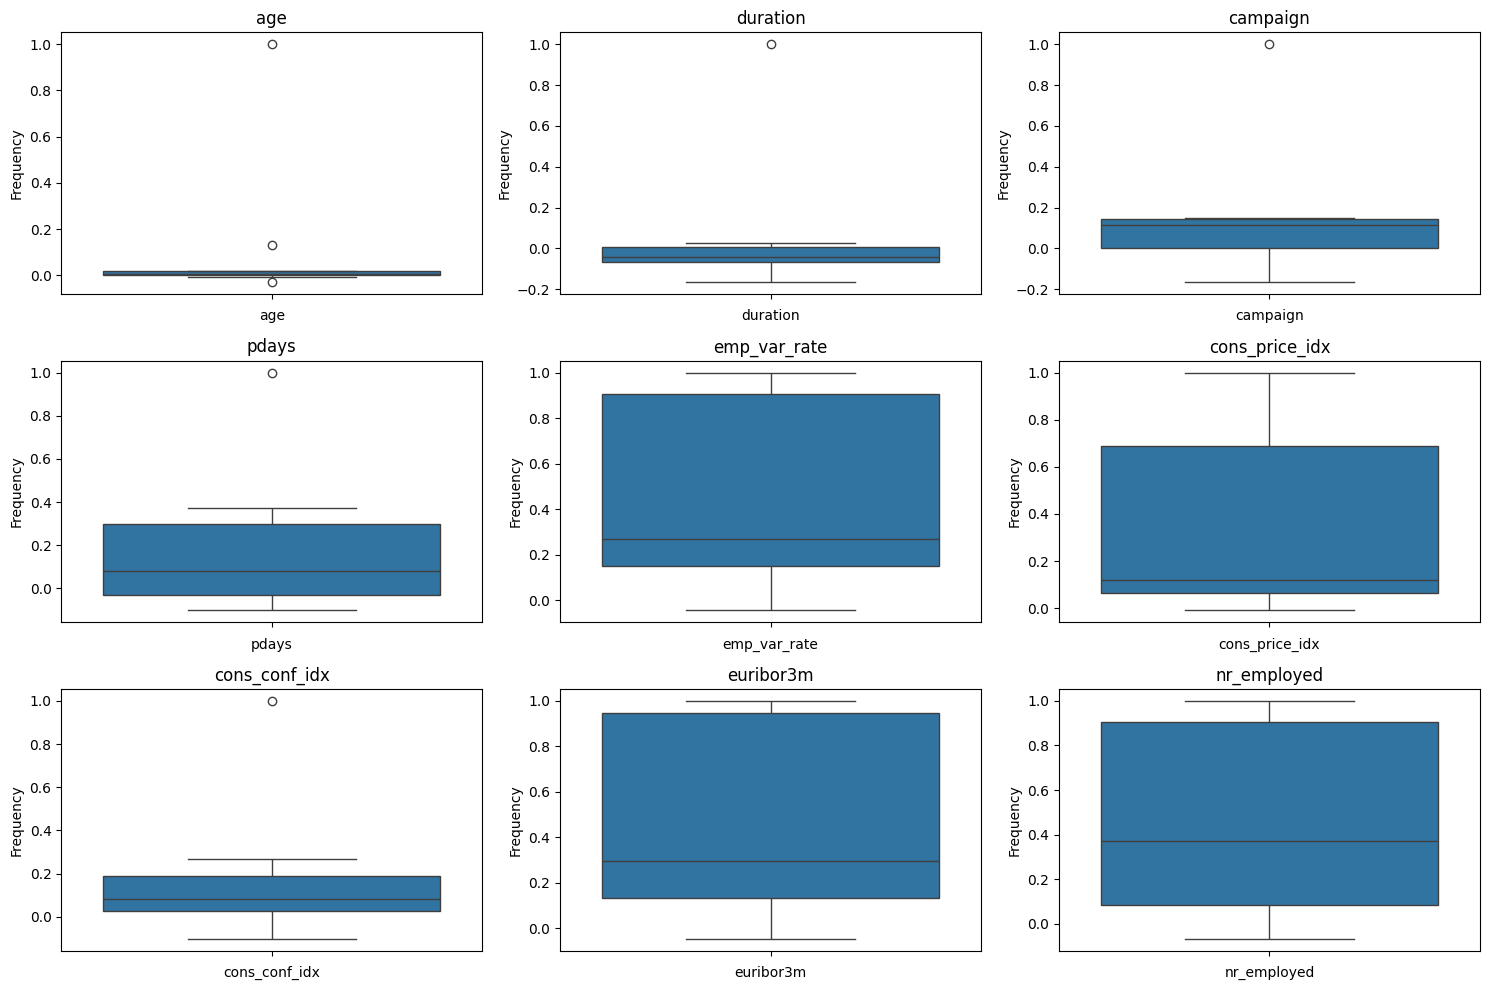

In [ ]:
#Boxplot for numerical columns
def plot_numerical_boxplot(df, columns, rows=3, cols=3): # Increased rows to 3 to accomodate 9 plots
    """
    Function to plot the distributions of numerical columns in a DataFrame using subplots.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of numerical columns to plot.
    rows (int): Number of rows in the subplot grid.
    cols (int): Number of columns in the subplot grid.
    """

    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(df[col], ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
plot_numerical_boxplot(df_num,df_num.columns, rows=3, cols=3)

- **Outliers:** Most variables show a few outliers, particularly **age, duration, and campaign**. These outliers are expected due to the nature of the data, though the capping and transformations have managed to keep them under control.
- **Balanced Distributions:** Variables like **emp_var_rate, cons_price_idx, euribor3m, and nr_employed** exhibit well-contained distributions without outliers, indicating stable economic conditions for these features.

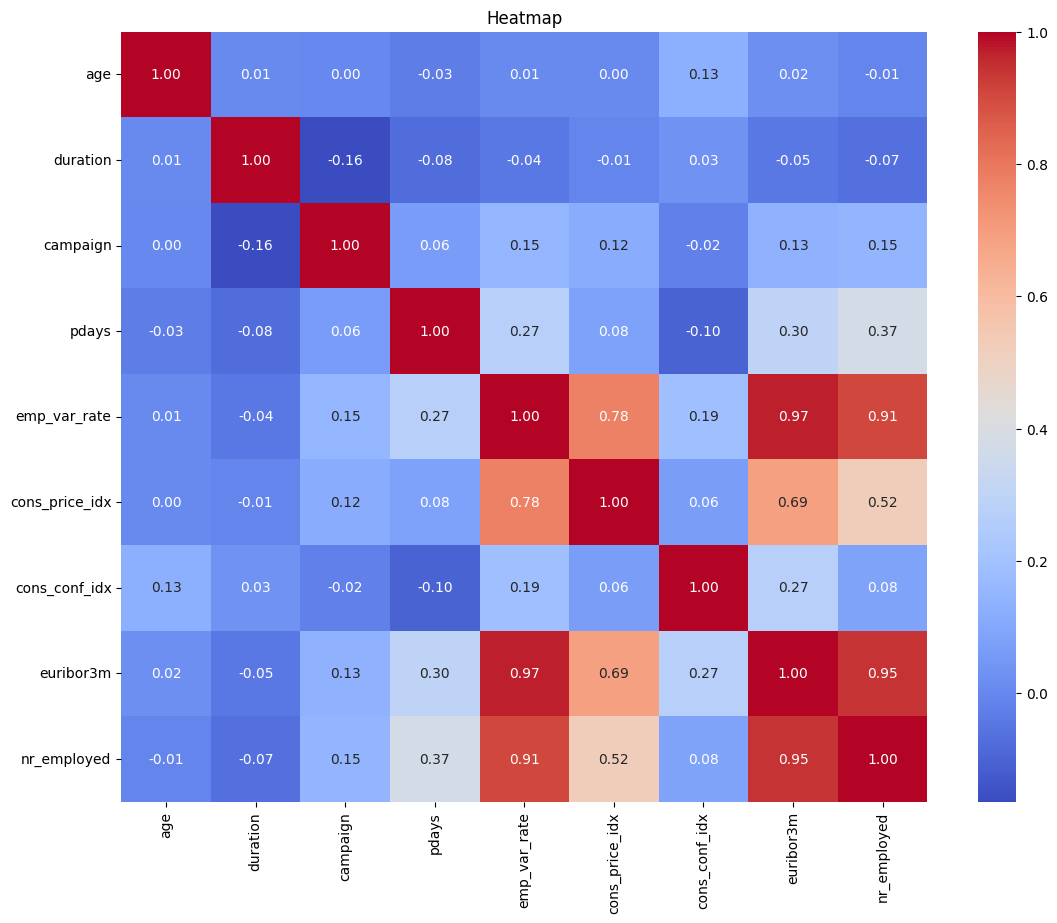

In [ ]:
##Correlation Heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(df_num,annot=True,fmt=".2f", cmap='coolwarm')
plt.title("Heatmap")
plt.show()

**Strong Positive Correlations:**
- **emp_var_rate & euribor3m (0.97):** A strong correlation suggests that these two economic indicators move closely together, likely reflecting broader economic conditions.
- **emp_var_rate & nr_employed (0.91):** This strong correlation indicates that the employment rate is closely tied to the economic variables measured by the employment variation rate.
- **euribor3m & nr_employed (0.95):** Another strong correlation, showing that the interest rate is closely related to employment levels, which is expected as interest rates can influence job creation.

**Weak correlations**
- **Campaign (Correlation: -0.0705):**
Campaign shows a weak negative correlation with the target. While not strongly influential, it suggests that as the number of contacts during the campaign increases, the likelihood of success decreases slightly.
- **Consumer Price Index (Correlation: -0.1362):**
The consumer price index **cons_price_idx** has a weak negative correlation. It might not significantly impact the campaign outcome.
- **Consumer Confidence Index (Correlation: 0.0660):**
The consumer confidence index **cons_conf_idx** shows a weak positive correlation. While not substantial, higher confidence levels could be associated with better campaign results.

**Variance Inflation Factor**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df_num.columns
vif_data["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

# Display sorted VIF values
vif_data.sort_values(by="VIF", ascending=False)

,feature,VIF
7,euribor3m,23600.122558
8,nr_employed,8563.921483
4,emp_var_rate,6109.005358
5,cons_price_idx,646.307462
6,cons_conf_idx,191.774110
3,pdays,2.556258
2,campaign,2.489769
1,duration,1.191633
0,age,1.089753


- **euribor3m (VIF: 23600)** and **nr_employed (VIF: 8564)** are extremely high, suggesting they are highly correlated with other features.
- **emp_var_rate (VIF: 6109)** also shows strong multicollinearity.
- Other features like **cons_price_idx and cons_conf_idx** have moderately high VIFs.

In [ ]:
'''
Used Point Biserial Correlation to assess the relationship
between numeric features like age, duration, and balance
with the target variable 'y'.
'''

from scipy.stats import pointbiserialr

def calculate_point_biserial(df, target):
    correlations = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        corr, _ = pointbiserialr(df[column], df[target])
        correlations[column] = corr
    return correlations


correlations = calculate_point_biserial(data_cleaned, 'y')
# Convert to DataFrame and visualize
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'Correlation with Target'])
print(corr_df)

         Variable  Correlation with Target
0             age                 0.023631
1        duration                 0.351011
2        campaign                -0.070475
3           pdays                -0.324914
4    emp_var_rate                -0.298334
5  cons_price_idx                -0.136211
6   cons_conf_idx                 0.065964
7       euribor3m                -0.307771
8     nr_employed                -0.354678


**Strongest positive correlation:**
- **duration:** This variable has the highest positive correlation (0.351011).

**Strongest negative correlation:**
- **nr_employed:** This variable has the highest negative correlation (-0.354678).

**Moderately strong negative correlation:**
- **pdays, emp_var_rate, euribor3m**


####**Selecting the best variables:**
Based on the correlation coefficients, the following variables appear to have the strongest relationships with the target variable and could be considered for further analysis or modeling:
- **duration**
- **nr_employed**
- **pdays**
- **emp_var_rate**
- **euribor3m**

**2.2 Bivariate analysis (Numerical-Target Variable)**

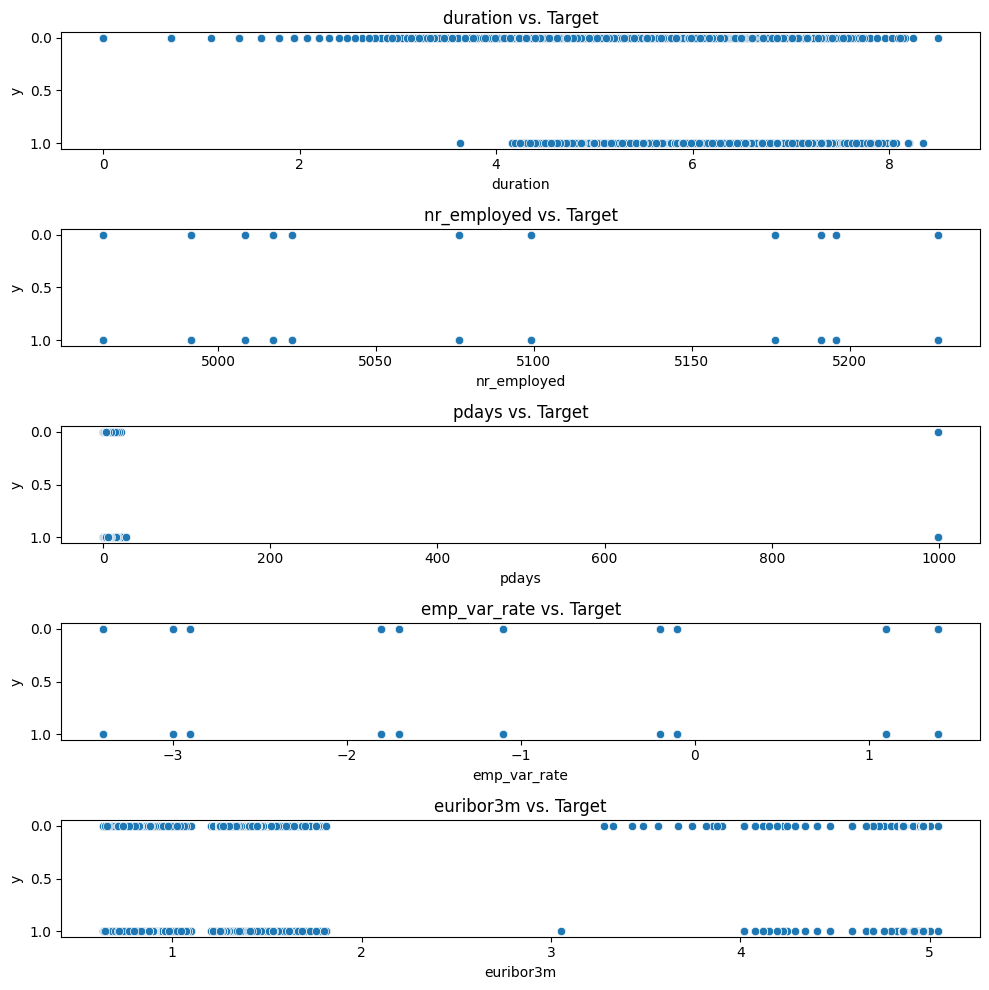

In [ ]:
##numerical variable plot with target variable
strong_features = ['duration','nr_employed','pdays','emp_var_rate','euribor3m']
# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(strong_features), figsize=(10,10))


# Iterate over the features and plot scatter plots
for i, feature in enumerate(strong_features):
    sns.scatterplot(x=data_cleaned[feature], y=data_cleaned['y'], ax=axes[i])
    axes[i].set_title(f"{feature} vs. Target")

plt.tight_layout()
plt.show()

- **Duration vs. Target:**
The duration of contact with clients appears to positively correlate with the target (likely a binary outcome). Longer durations tend to result in a higher likelihood of success (e.g., subscription).

- **nr_employed vs. Target:**
The number of employees (presumably related to the economic context) shows some association with the target. Higher employment numbers may lead to better outcomes.

- **pdays vs. Target:**
The number of days since the last contact (pdays) also impacts the target. A shorter time since the last contact tends to be associated with successful outcomes.

- **emp_var_rate vs. Target:**
The employment variation rate (emp_var_rate) affects the target. Negative emp_var_rate values (economic downturns) may lead to better results.

- **cons_price_idx vs. Target:**
The consumer price index (cons_price_idx) shows a relationship with the target. Lower consumer prices may be associated with positive outcomes.

- **euribor3m vs. Target:**
The 3-month Euribor rate (euribor3m) impacts the target. Lower rates tend to result in higher success rates.

## 2.3 Univariate Categorical columns




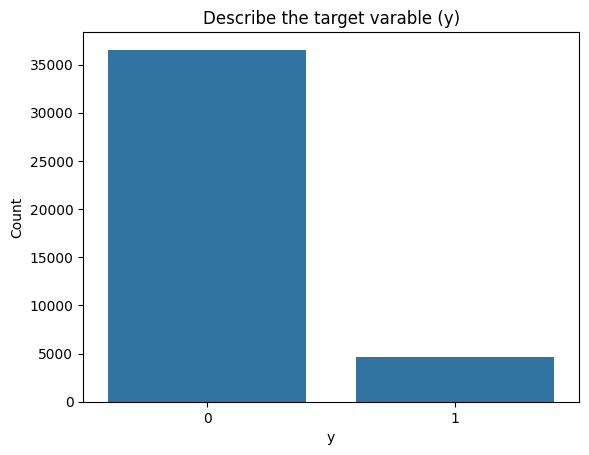

In [ ]:
# Describe the target varable
sns.countplot(x='y',data=data_fd)
plt.xlabel("y")
plt.ylabel("Count")
plt.title("Describe the target varable (y)")
plt.show()

- The bar labeled **‘0’** (likely representing one class) is significantly taller than the bar labeled **‘1’** (likely representing another class).
- This indicates that the majority class **(‘0’)** has a much larger representation than the minority class **(‘1’).**
- Imbalanced datasets can impact model performance, and it’s essential to address this imbalance during data preprocessing and modeling.

In [ ]:
#categorical columns
df_category = data_fd.select_dtypes(include=['category'])
df_category.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,y
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,No Contact,nonexistent,0
1,technician,married,unknown,no,no,no,cellular,nov,fri,No Contact,nonexistent,0
2,management,single,university.degree,no,yes,no,cellular,jun,thu,1-2,success,1
3,services,married,high.school,no,no,no,cellular,apr,fri,No Contact,nonexistent,0
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1-2,success,1


In [ ]:
#Summary Stastics
df_category.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,4,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,No Contact,nonexistent,0
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,35563,36548


- **Dominant Categories:** Certain categories are very dominant in banking dataset. For instance, most clients are married (married), have a university degree, and were contacted via cellular.

- **Target Variable (y):** There is a significant class imbalance in the target variable, as most clients did not subscribe to the term deposit (36,548 no vs. 4,640 yes if 0 corresponds to no). This imbalance could affect model performance and might require techniques like oversampling, undersampling, or using algorithms that handle imbalance well.

- **Categorical Features with High Imbalance:** Variables like default, housing, loan, and poutcome have a dominant category (no, yes, no, and nonexistent respectively), suggesting that these features might have limited variability in influencing the target unless the minority classes are significant.

**Label Encoding**

In [ ]:
#Label Encoding the Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Label encode the categorical variables
df_encoded = data_cleaned.copy()
label_encoders = {}
for column in df_category:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Now df_encoded contains numeric values for all categorical columns



In [ ]:
#Calculate Correlation Matrix
# Calculate Pearson correlation matrix
correlation_matrix = df_encoded[df_category.columns].corr(method='pearson')

# Or use Spearman's rank correlation
#correlation_matrix = df_encoded[df_category].corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix)

                  job   marital  education   default   housing      loan  \
job          1.000000  0.027897   0.134121 -0.028277  0.006962 -0.010209   
marital      0.027897  1.000000   0.109220 -0.079450  0.010467  0.005788   
education    0.134121  0.109220   1.000000 -0.186859  0.016825  0.006384   
default     -0.028277 -0.079450  -0.186859  1.000000 -0.015815 -0.003782   
housing      0.006962  0.010467   0.016825 -0.015815  1.000000  0.044296   
loan        -0.010209  0.005788   0.006384 -0.003782  0.044296  1.000000   
contact     -0.025132 -0.054501  -0.105726  0.135238 -0.082186 -0.008556   
month       -0.033213 -0.007629  -0.082684 -0.015830 -0.018141 -0.005705   
day_of_week -0.000844  0.002202  -0.017986 -0.008701  0.003339 -0.009344   
previous    -0.013472 -0.033921  -0.027042  0.102130 -0.024903 -0.000667   
poutcome     0.011504  0.001912   0.017009  0.023417 -0.011783 -0.001511   
y            0.025122  0.046203   0.057799 -0.099352  0.011552 -0.004909   

           

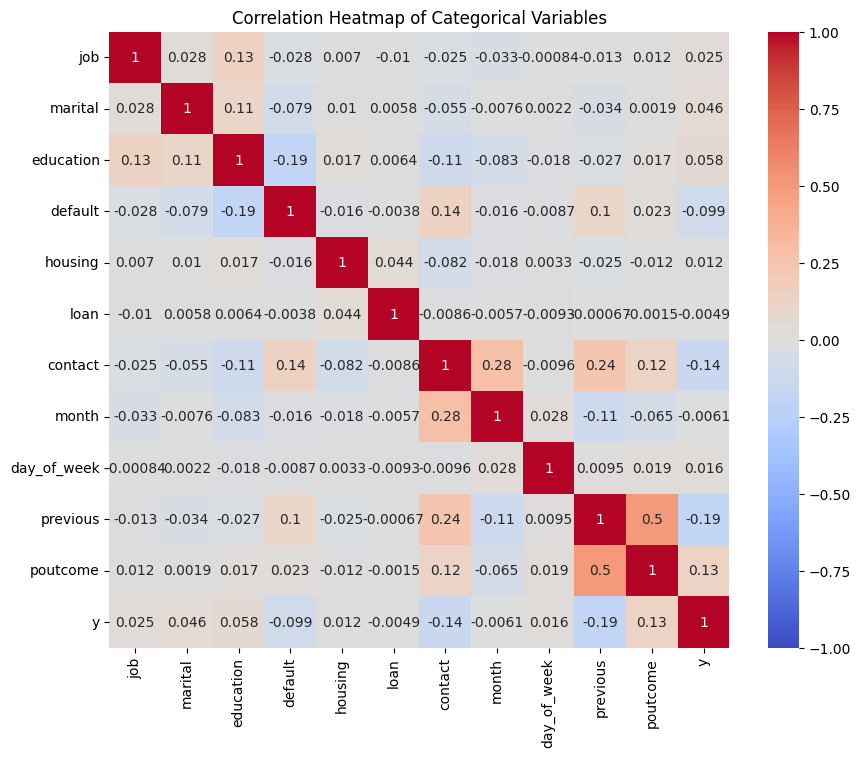

In [ ]:
#Display correlation details of categorical variables after label encoding (df_encoded used)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Categorical Variables")
plt.show()

- There are no extremely high correlations (e.g., above 0.8 or 0.9) between the categorical variables. The highest correlation observed is between **previous** and **poutcome** at **0.5**, and **Contact & Previous** at **0.24** which is moderate but not necessarily indicative of severe multicollinearity.

###**Correlations with the Target Variable (y):**

**Strong correlations**
- **Poutcome & y (0.13):** The variable poutcome has a moderate positive correlation with the target variable y, indicating that the outcome of previous campaigns is related to the likelihood of the current campaign being successful.
- **Previous & y (-0.19):** The number of previous contacts has a negative correlation with y, which might suggest that clients who were contacted more frequently in the past are less likely to respond positively in the current campaign.
- **Contact & y (-0.14):** The type of contact method also has a negative correlation with the target variable, indicating that certain contact methods might be less effective in achieving a positive response.

**Weak correlations**
- **Job(Categorical Variable):**
The correlation with the target (‘y_yes’) is not very strong. Different job categories may not significantly impact the campaign outcome.
- **Marital (Categorical Variable):**
Marital status also shows a relatively weak correlation. It might not be a decisive factor in campaign success.
- **Education(Categorical Variable):**
Education level has a moderate correlation but isn’t strongly predictive of the target.
- **Default(Categorical Variable):**
The ‘default’ category (whether the client has credit in default) doesn’t exhibit a strong relationship with the target.

In [ ]:
# For a quick count of unique values in each column
for col in df_category:
    print(df_encoded[col].value_counts())


job
0     10422
1      9254
9      6743
7      3969
4      2924
5      1720
2      1456
6      1421
3      1060
10     1014
8       875
11      330
Name: count, dtype: int64
marital
1    24928
2    11568
0     4612
3       80
Name: count, dtype: int64
education
6    12168
3     9515
2     6045
5     5243
0     4176
1     2292
7     1731
4       18
Name: count, dtype: int64
default
0    32588
1     8597
2        3
Name: count, dtype: int64
housing
2    21576
0    18622
1      990
Name: count, dtype: int64
loan
0    33950
2     6248
1      990
Name: count, dtype: int64
contact
0    26144
1    15044
Name: count, dtype: int64
month
6    13769
3     7174
1     6178
4     5318
7     4101
0     2632
8      718
9      570
5      546
2      182
Name: count, dtype: int64
day_of_week
2    8623
1    8514
4    8134
3    8090
0    7827
Name: count, dtype: int64
previous
3    35563
0     5315
1      304
2        6
Name: count, dtype: int64
poutcome
1    35563
0     4252
2     1373
Name: count, dtype:

**Outliers- Categorical**
- **Marital:** The category 3 has only 80 instances, making it a potential outlier.
- **Education:** The category 4 has only 18 instances.
- **Default:** The category 2 has only 3 instances, which is extremely rare.
- **Previous:** The category 2 has only 6 instances, which is significantly lower than the other categories.

In [ ]:
data_cleaned['job'].value_counts().reset_index()

,job,count
0,admin.,10422
1,blue-collar,9254
2,technician,6743
3,services,3969
4,management,2924
5,retired,1720
6,entrepreneur,1456
7,self-employed,1421
8,housemaid,1060
9,unemployed,1014


In [ ]:
data_cleaned['education'].value_counts().reset_index()

,education,count
0,university.degree,12168
1,high.school,9515
2,basic.9y,6045
3,professional.course,5243
4,basic.4y,4176
5,basic.6y,2292
6,unknown,1731
7,illiterate,18


In [ ]:
data_cleaned['marital'].value_counts().reset_index()

,marital,count
0,married,24928
1,single,11568
2,divorced,4612
3,unknown,80




**marital:**
- In this marital status 41188 out of 24928 person's are  married and 11568 are single and 4612 are divorced also in this data  80 person are unknown.








In [ ]:
data_cleaned['loan'].value_counts()

,count
loan,
no,33950
yes,6248
unknown,990


In [ ]:
data_cleaned['contact'].value_counts()

,count
contact,
cellular,26144
telephone,15044


In [ ]:
data_cleaned['poutcome'].value_counts()

,count
poutcome,
nonexistent,35563
failure,4252
success,1373


## 2.3 Bivariate Categorical columns


**Visualisation**

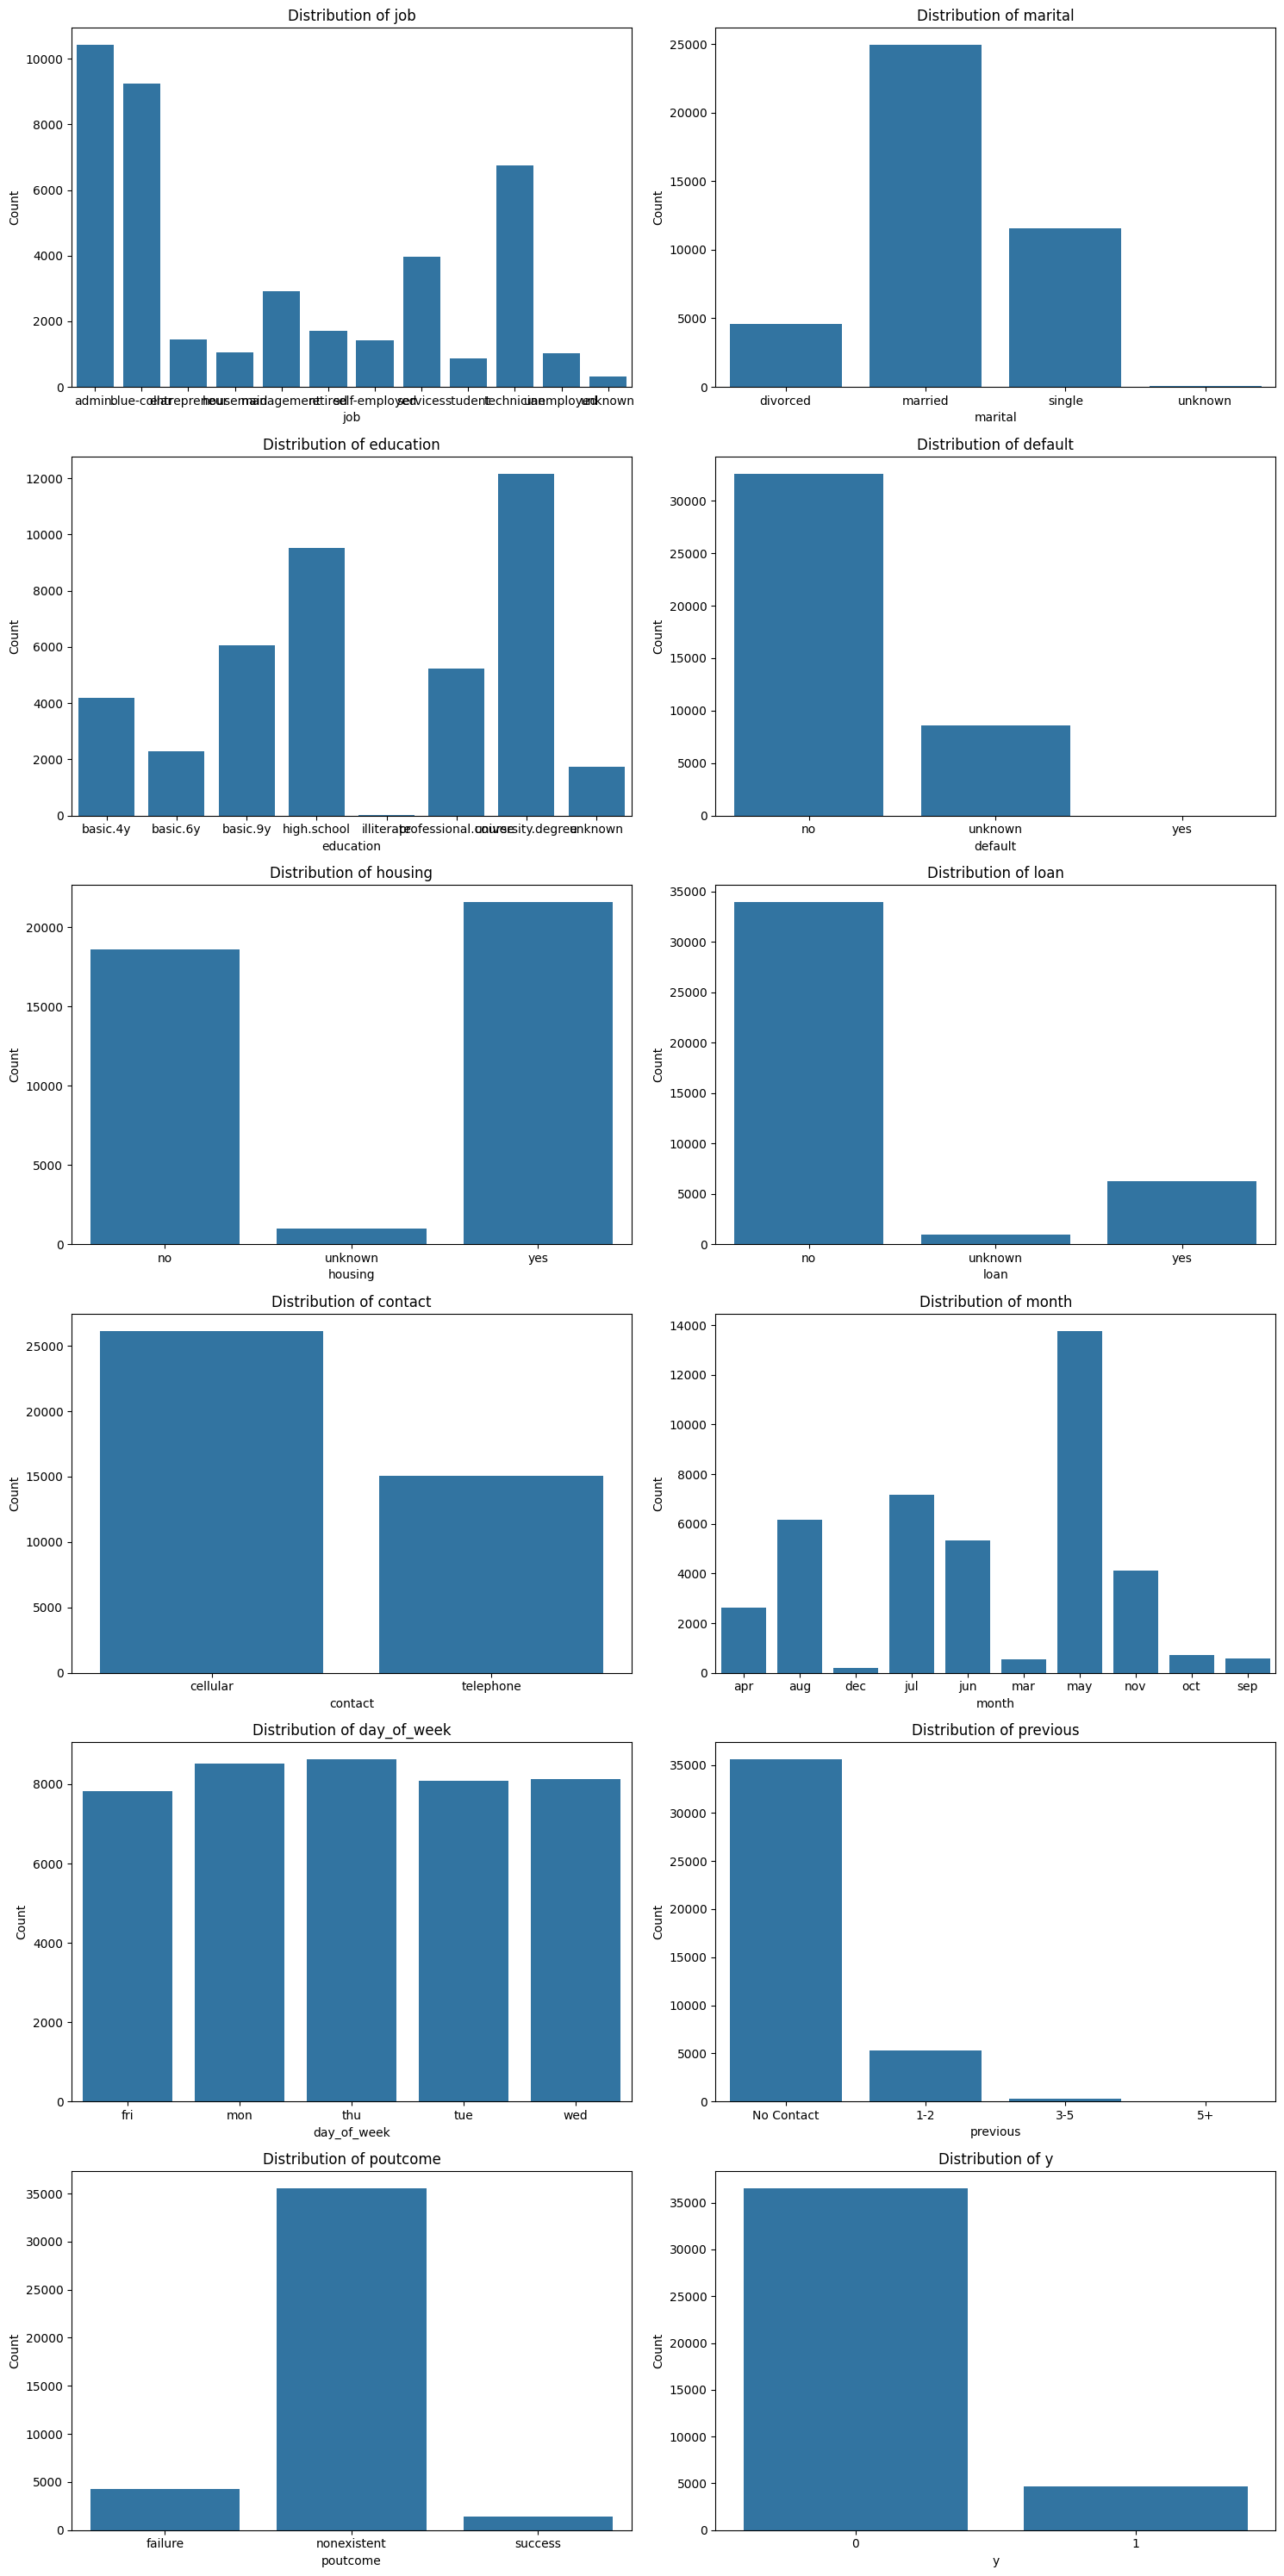

In [ ]:
import math
# Number of columns to plot
num_cols = len(df_category.columns)

# Determine the number of rows and columns for the subplot grid
cols = 2  # can change this to any number of columns you want in the grid
rows = math.ceil(num_cols / cols)

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Adjust figsize based on the number of plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, col in enumerate(df_category.columns):
    sns.barplot(x=df_category[col].value_counts().index, y=df_category[col].value_counts(), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


- **Duration vs. Target:** The duration of contact with clients appears to positively correlate with the target (likely a binary outcome). Longer durations tend to result in a higher likelihood of success (e.g., subscription).
- **nr_employed vs. Target:** The number of employees (presumably related to the economic context) shows some association with the target. Higher employment numbers may lead to better outcomes.
- **pdays vs. Target:** The number of days since the last contact (pdays) also impacts the target. A shorter time since the last contact tends to be associated with successful outcomes.
- **emp_var_rate vs. Target:** The employment variation rate (emp_var_rate) affects the target. Negative emp_var_rate values (economic downturns) may lead to better results.
- **cons_price_idx vs. Target:** The consumer price index (cons_price_idx) shows a relationship with the target. Lower consumer prices may be associated with positive outcomes.
- **euribor3m vs. Target:** The 3-month Euribor rate (euribor3m) impacts the target. Lower rates tend to result in higher success rates.

Text(0.5, 1.0, 'job vs loan')

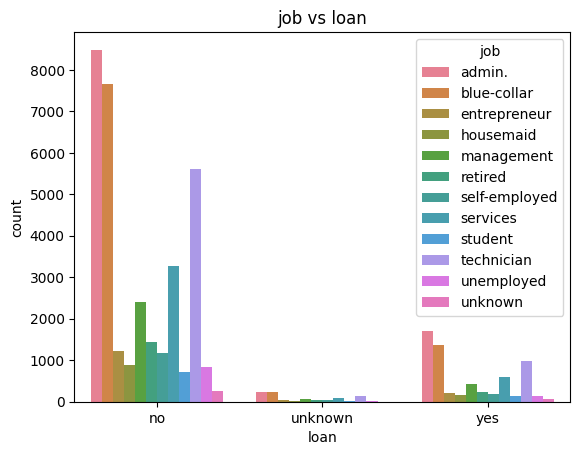

In [ ]:
#Distribution of cateorical varaibles
sns.countplot(x='loan',  hue = 'job' ,data=data_fd)
plt.title('job vs loan')

- **Job vs Loan:** The type of job appears to influence loan ownership. Administrative and blue-collar workers are more likely to have loans, but the majority do not, which might imply cautious financial behavior in these job sectors.

Text(0.5, 1.0, ' marital vs y')

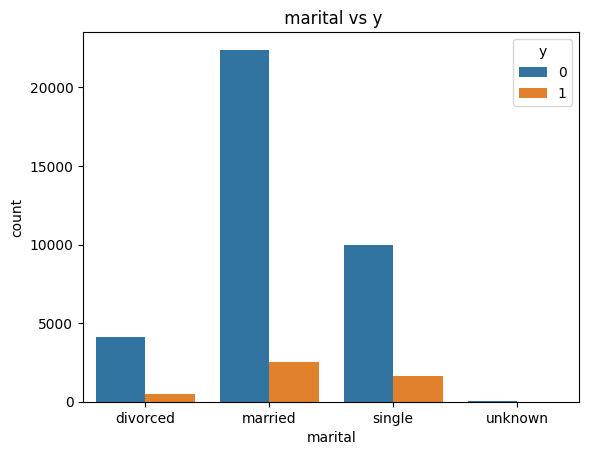

In [ ]:
sns.countplot(x='marital', hue = 'y', data=data_fd)
plt.title(' marital vs y')

**Marital Status vs y:** Marital status is an influential factor in determining the likelihood of subscribing to the service, with married individuals being less likely to subscribe.

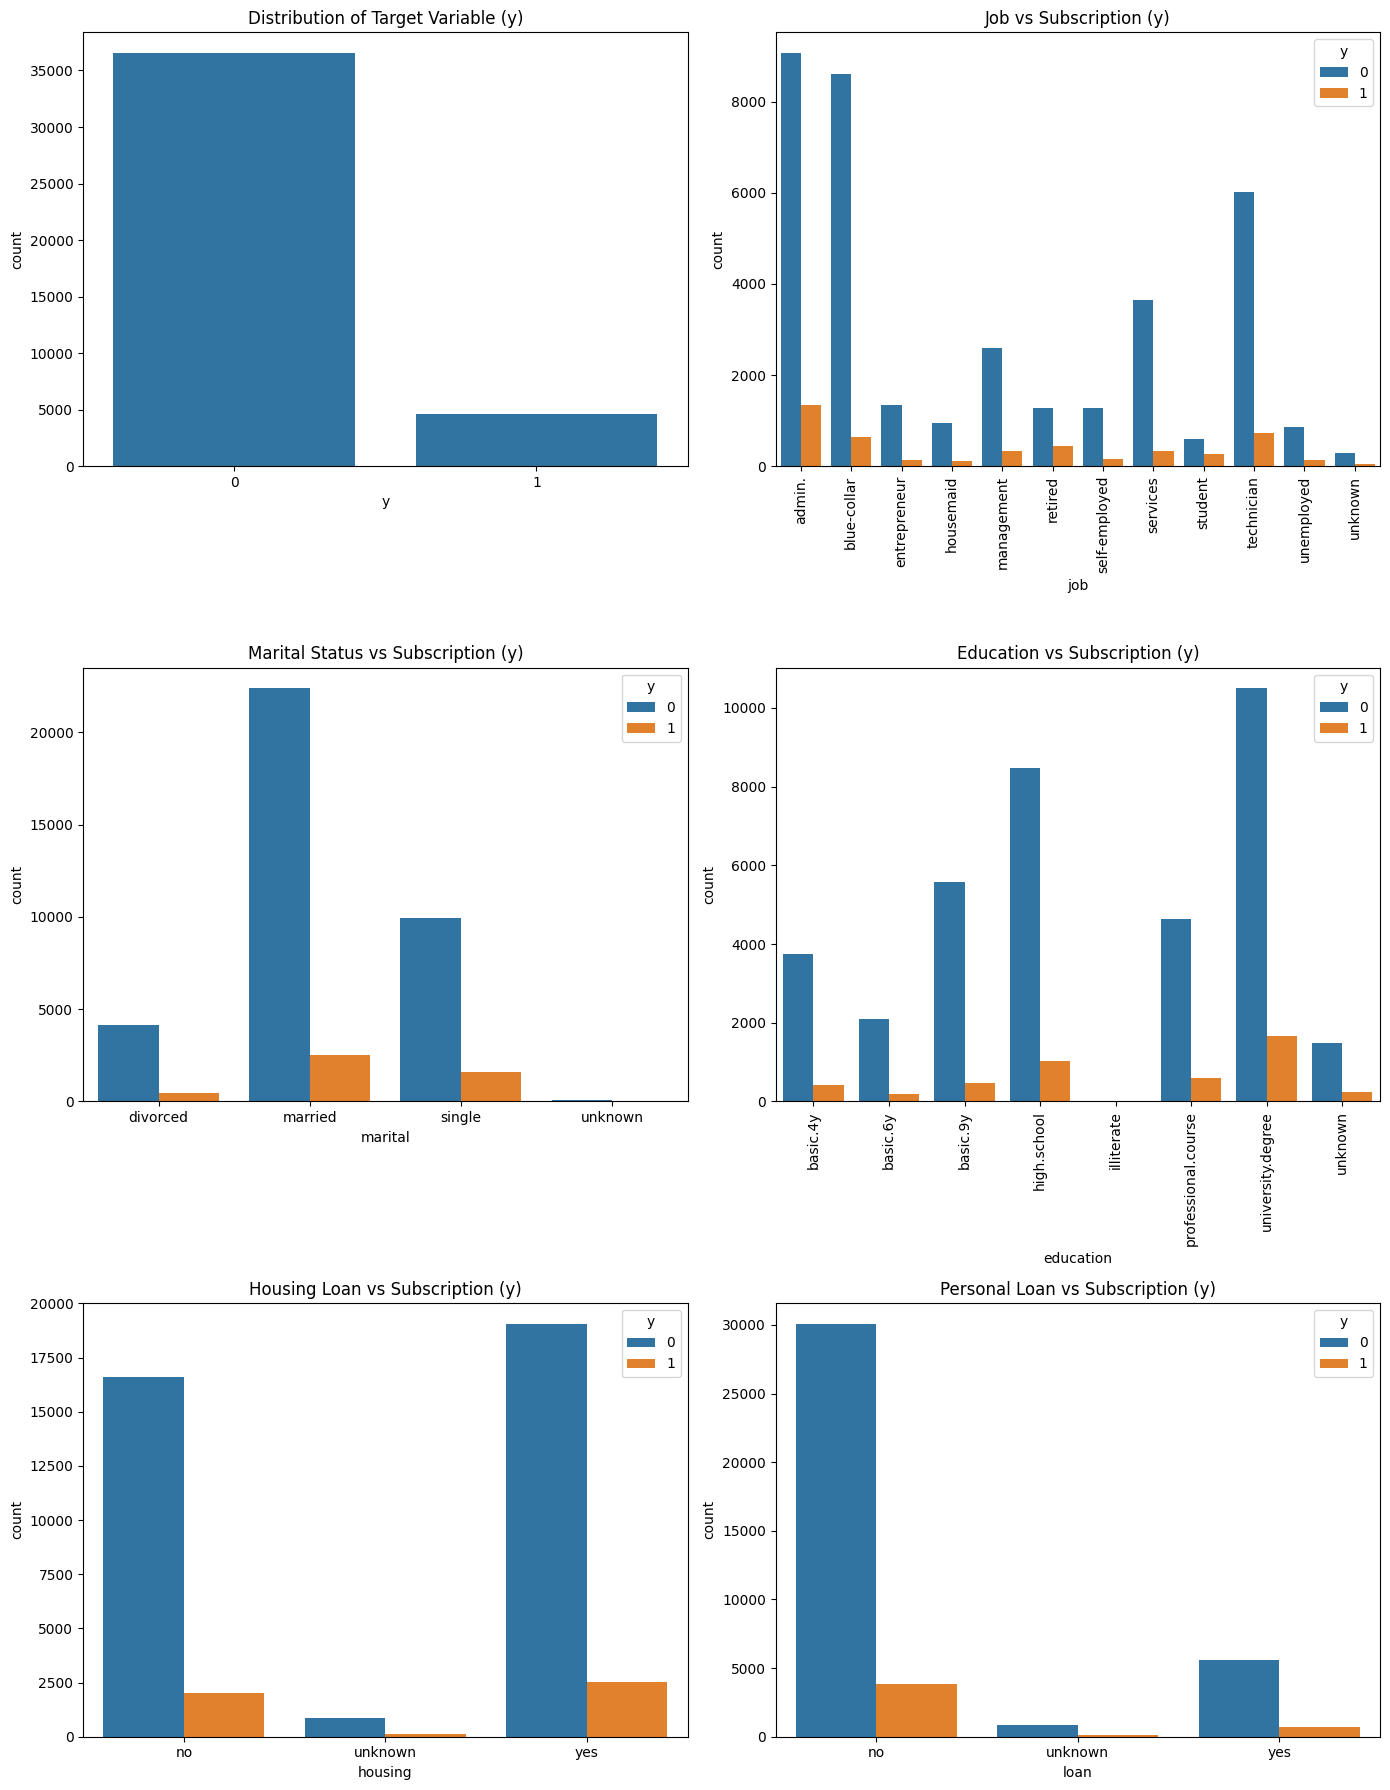

In [ ]:
# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Plot the distribution of the target variable 'y'
sns.countplot(x='y', data=data_fd, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Target Variable (y)')

# Plot job vs y
sns.countplot(x='job', hue='y', data=data_fd, ax=axes[0, 1])
axes[0, 1].set_title('Job vs Subscription (y)')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot marital status vs y
sns.countplot(x='marital', hue='y', data=data_fd, ax=axes[1, 0])
axes[1, 0].set_title('Marital Status vs Subscription (y)')

# Plot education vs y
sns.countplot(x='education', hue='y', data=data_fd, ax=axes[1, 1])
axes[1, 1].set_title('Education vs Subscription (y)')
axes[1, 1].tick_params(axis='x', rotation=90)

# Plot housing loan vs y
sns.countplot(x='housing', hue='y', data=data_fd, ax=axes[2, 0])
axes[2, 0].set_title('Housing Loan vs Subscription (y)')

# Plot loan vs y
sns.countplot(x='loan', hue='y', data=data_fd, ax=axes[2, 1])
axes[2, 1].set_title('Personal Loan vs Subscription (y)')

plt.tight_layout()
plt.show()

####**job vs. Subscription (y):**
- Certain job categories, such as **"admin" and "blue-collar,"** have a high number of non-subscribers compared to subscribers.
- Job roles like **"management," "technician," and "retired"** show a relatively higher proportion of subscribers compared to other roles, indicating these might be more responsive to term deposit offers.

####**Marital Status vs. Subscription (y):**
- **Married** individuals are less likely to subscribe compared to other marital statuses.
- **Divorced and single individuals** show a slightly higher proportion of subscribers, suggesting they might be more open to term deposits.

####**Education vs. Subscription (y):**
- Individuals with **higher education levels**, such as those with a **university degree or professional courses**, are more likely to subscribe.
- Those with only **basic education levels** have a higher non-subscription rate, indicating that education level may be a significant factor in subscription decisions.

####**Housing Loan vs. Subscription (y):**
- Customers **without a housing loan** are more likely to subscribe compared to those **with a housing loan**.
- This suggests that individuals who are not burdened by housing loans may be more financially flexible and willing to invest in term deposits.

####**Personal Loan vs. Subscription (y):**
- A clear majority of subscribers do **not have a personal loan**.
- This indicates that customers without personal loans are more inclined to subscribe, possibly because they have more disposable income to allocate towards savings products like term deposits.


These inferences suggest that **demographic and socio-economic factors** such as **job type, marital status, education level, and loan status** play a crucial role in determining the likelihood of term deposit subscription.

## 2.4 Multivariate Variables

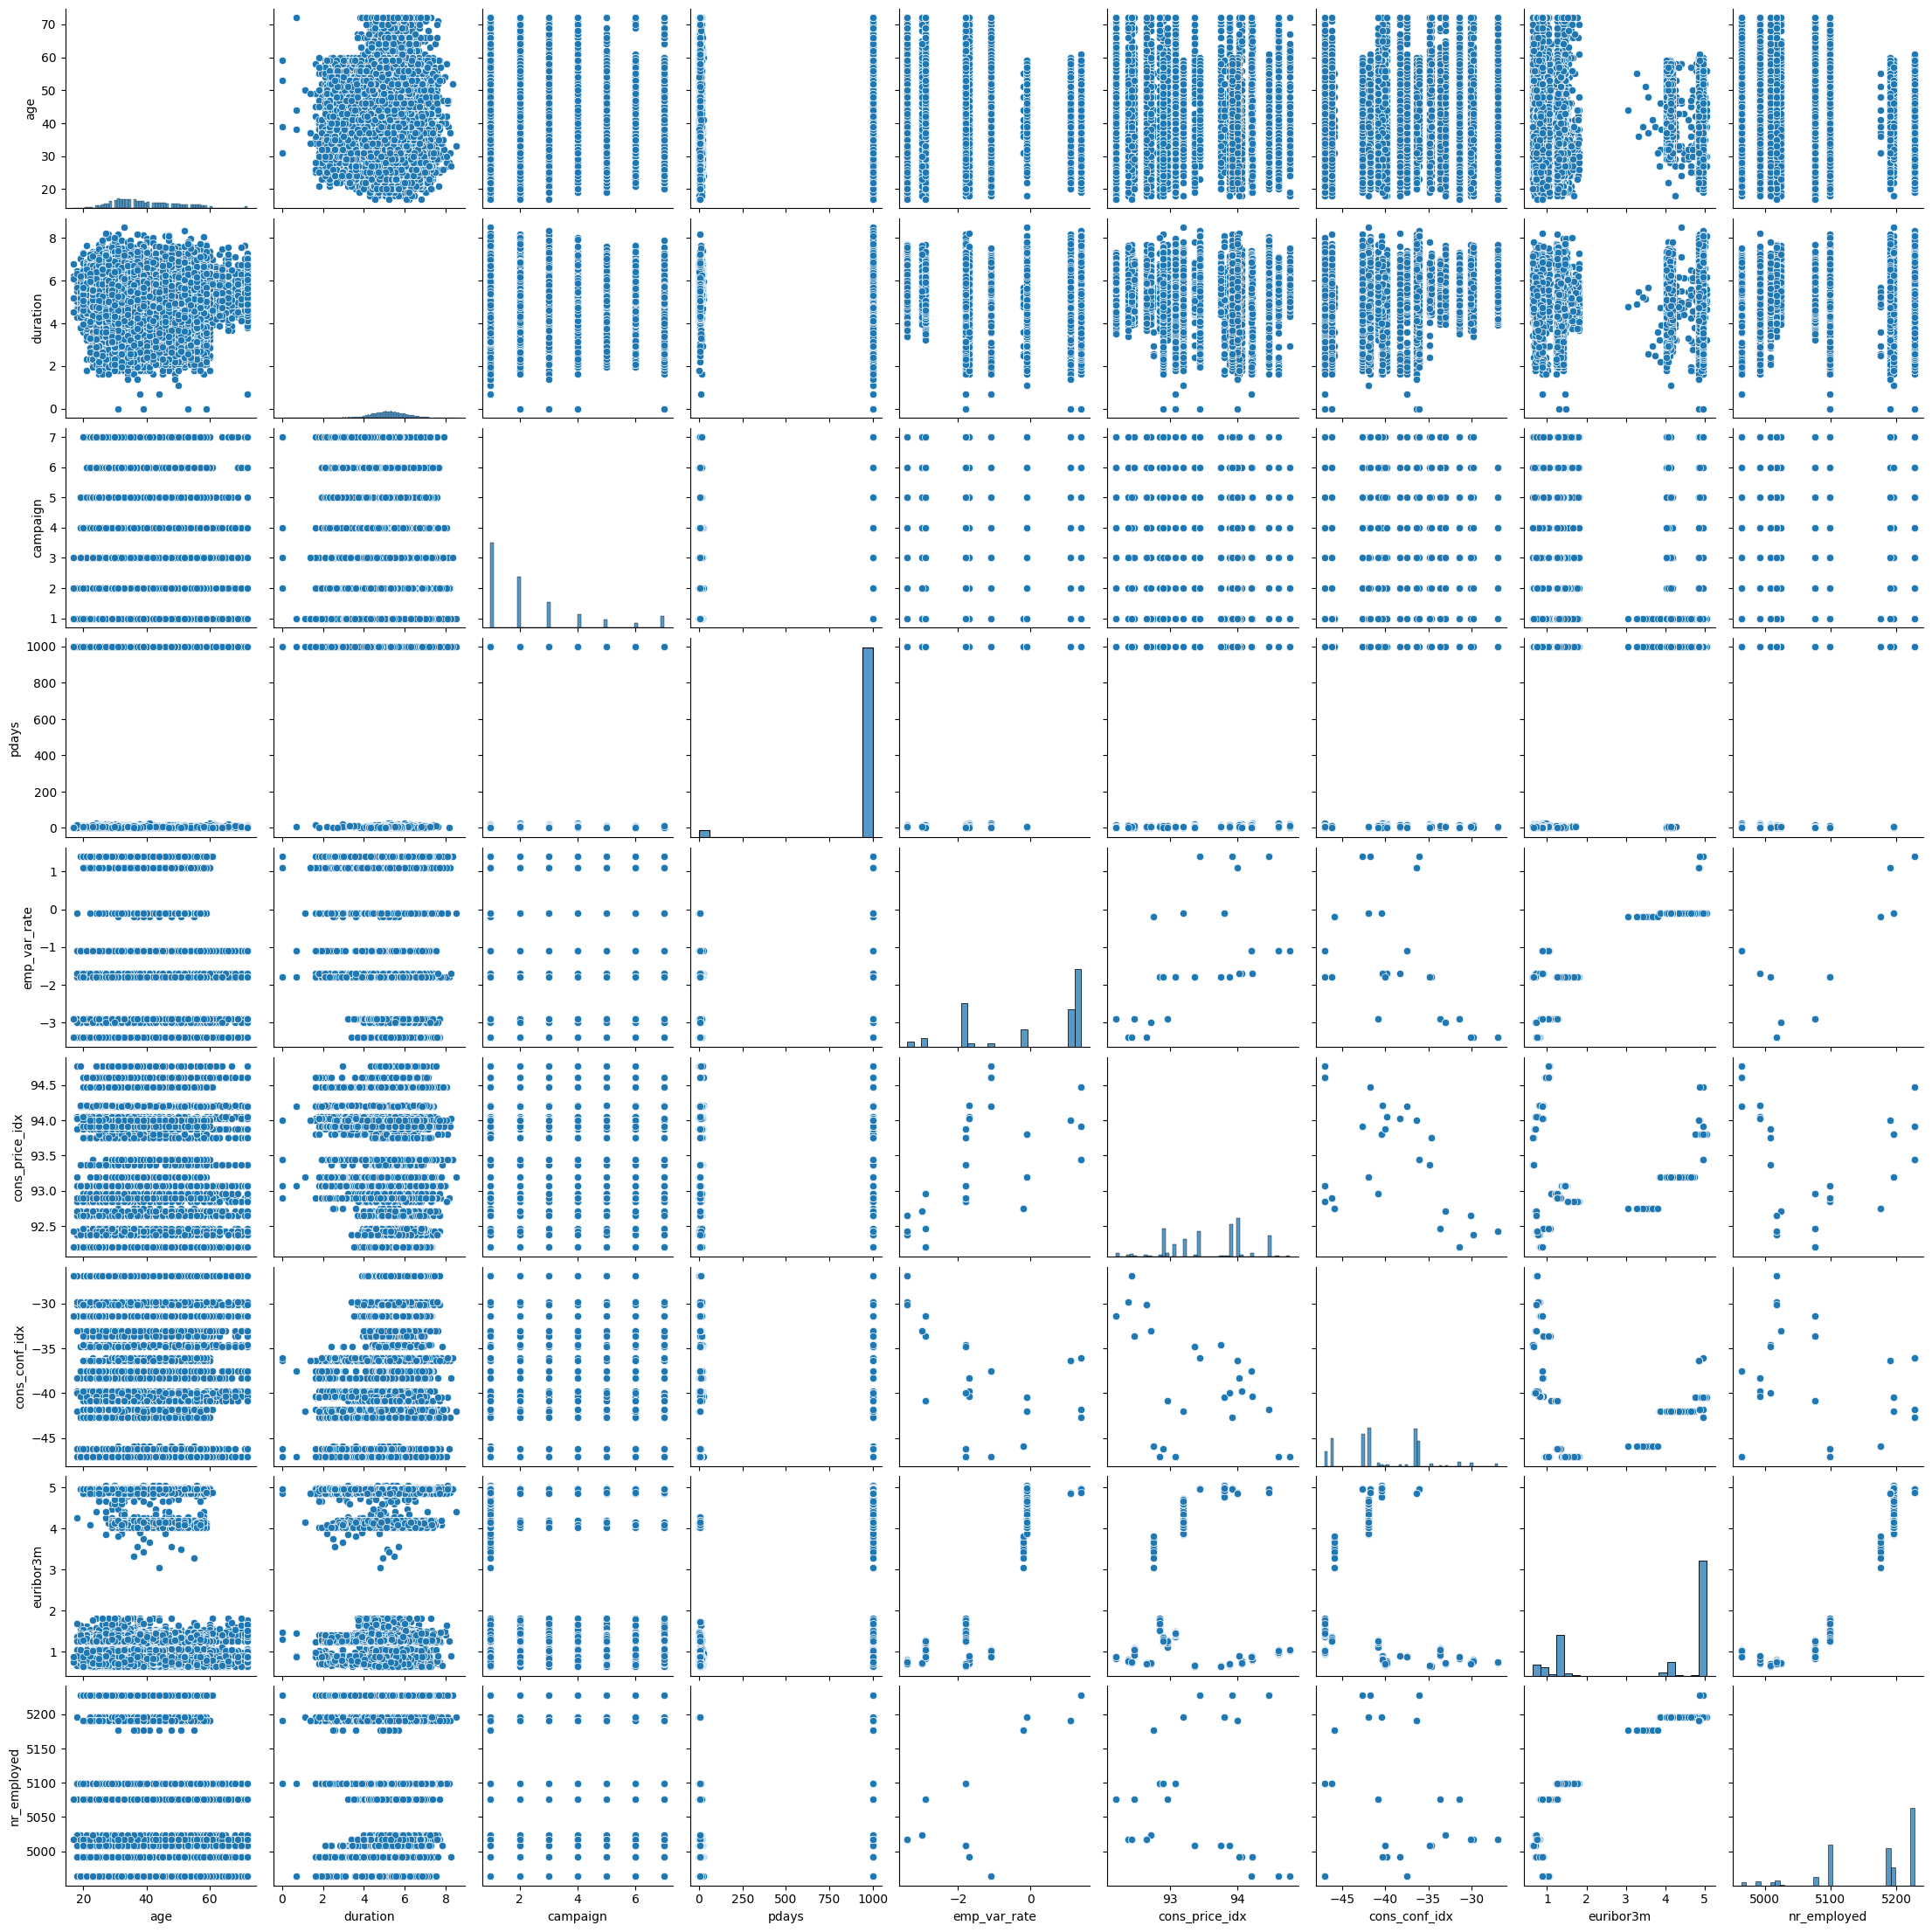

In [ ]:
#shows distributions of multiple variables
sns.pairplot(data_cleaned)

**Age vs. Other Variables:**
- There is a wide distribution of age, with most data points concentrated around younger to middle-aged individuals.
- The relationship between age and other features like balance or duration appears scattered, suggesting no strong linear correlation.

**Balance Distribution:**
- Balance shows a skewed distribution with a high concentration of data points around lower values.
- There are some outliers with significantly higher balances, which might need further investigation.

**Duration vs. Other Variables:**
- Duration seems to show some level of distinction across other variables, particularly with campaign and pdays, where certain patterns are visible.
- Higher durations seem to correlate with fewer contacts in the campaign, indicating that longer engagements may result in fewer follow-ups.

**Campaign vs. Pdays:**
- There appears to be a cluster where pdays is concentrated around certain values (likely due to specific follow-up strategies).
- The scatter indicates a lack of strong linear relationships but suggests clusters that could be explored with unsupervised learning methods.

**Job and Marital Status:**
- Categorical variables like job and marital are not clearly represented in a scatter plot, indicating that their relationships might be better understood using other visualization methods like bar plots or box plots.

**Other Features:**
- Features like previous, emp.var.rate, cons.price.idx, and nr.employed show a sparse distribution of points, suggesting that these variables might have minimal linear relationships with others.
- Some variables like euribor3m might show more distinct patterns with certain features, hinting at specific market conditions influencing customer behavior.

**Summary**
- The scatter plot matrix indicates that while some features like **duration and campaign** might show potential for understanding customer behavior, many of the relationships between features appear non-linear or scattered.

In [ ]:
##Copy of cleaned dataframe
data_analysis_copy = data_cleaned.copy()

###**Inference EDA:**

- **Numerical variables** such as **duration, pdays, campaign, emp_var_rate, and euribor3m** are likely to be important in predicting the target.

- **Categorical variables** such as **previous, poutcome, contact, and education** seem to have some influence on the target variable. **Poutcome and previous** may be particularly important.

- **Key Bivariate Combinations:**
1. **Categorical-Categorical:**
- previous and poutcome
- contact and poutcome

2. **Numerical-Numerical:**
- emp_var_rate and euribor3m
- duration and campaign

3. **Categorical-Numerical:**
- education and duration
- contact and pdays

These combinations of bivariate variables might play a significant role in predicting the target outcome based on their individual correlations and potential interactions with each other.



###**Next Steps:**
 - **Imbalanced datasets** can impact model performance, and it’s essential to address this imbalance during data preprocessing and modeling.
 - More **advanced techniques such as feature engineering**, or the use of non-linear models, might be necessary to capture the underlying patterns in the data.
 - Removing one of the highly correlated features is not possible since importance of certain bivariate combinations were found. For example, between **euribor3m, nr_employed, and emp_var_rate**.So instead of removing features will use **PCA** to reduce the dimensionality while retaining the variance in the data.

**One - Hot Encoding Categorical variables**

In [ ]:
#part of Step2: Data Preprocessing
#Label encoding was also used in df_encoded dataframe cell 32
#one-hot encoding used to treat outliers found in categorical variables
# column names are in lower case
# changed df_encoded[['marital','education','default','previous']] to a list of column names.
df_encoded = pd.get_dummies(df_encoded, columns=['marital','education','default','previous'], drop_first=True)

### **Step 3: Feature Engineering**

**Normalize or Standardize Numerical Features**

In [ ]:

#Normalization or standardization can help improve the performance of certain algorithms.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize numerical features (mean=0, std=1)
scaler = StandardScaler()
df_fd_numerical[df_fd_numerical.columns] = scaler.fit_transform(df_fd_numerical[df_fd_numerical.columns])

df_scaled = pd.DataFrame(df_fd_numerical, columns=df_fd_numerical.columns)
df_scaled.head()
# Alternative: Normalize numerical features to a range (e.g., 0 to 1)
# scaler = MinMaxScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.381527,-0.186230,-0.565922,0.195414,-0.349494,0.839061,-0.227465,0.951267,0.773575,0.845170
1,1.245157,-0.463926,-0.565922,0.195414,-0.349494,-0.115781,-0.649003,-0.323542,0.230456,0.398115
2,-1.153816,0.311309,0.156105,-5.117342,3.691766,-1.134279,0.828107,0.151810,-1.667578,-2.428157
3,-0.098268,-0.282652,-0.204909,0.195414,-0.349494,-1.197935,-0.864955,-1.425496,-1.277824,-0.940281
4,1.437075,-0.467783,-0.565922,-5.133393,1.671136,-1.898153,-2.374889,1.966794,-1.586859,-1.257233


**PCA**

In [ ]:
#To address mullticollinerity issues
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Adjust to retain 95% of the variance
principal_components = pca.fit_transform(df_scaled)


In [ ]:

# Concatenate the encoded and scaled DataFrames along the columns
merged_df = pd.concat([df_scaled,df_encoded], axis=1)
# Check for duplicate columns
duplicate_columns = merged_df.columns[merged_df.columns.duplicated()]

# Drop duplicate columns
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

In [ ]:
# merged DataFrame details
print(merged_df.head())

        age  duration  campaign     pdays  previous  emp_var_rate  \
0  0.381527 -0.186230 -0.565922  0.195414 -0.349494      0.839061   
1  1.245157 -0.463926 -0.565922  0.195414 -0.349494     -0.115781   
2 -1.153816  0.311309  0.156105 -5.117342  3.691766     -1.134279   
3 -0.098268 -0.282652 -0.204909  0.195414 -0.349494     -1.197935   
4  1.437075 -0.467783 -0.565922 -5.133393  1.671136     -1.898153   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  ...  education_3  \
0       -0.227465       0.951267   0.773575     0.845170  ...        False   
1       -0.649003      -0.323542   0.230456     0.398115  ...        False   
2        0.828107       0.151810  -1.667578    -2.428157  ...        False   
3       -0.864955      -1.425496  -1.277824    -0.940281  ...         True   
4       -2.374889       1.966794  -1.586859    -1.257233  ...        False   

   education_4  education_5  education_6  education_7  default_1  default_2  \
0        False        False        Fa

In [ ]:
#Shape of merged dataframe
print(merged_df.shape)

(41188, 33)


In [ ]:
#copy of merged_df created for further analysis
merged_df_copy = merged_df.copy()

**Feature Generation**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Check class distribution
print(merged_df['y'].value_counts())

# Feature engineering: Created interaction terms
merged_df['duration_nr_employed'] = merged_df['duration'] * merged_df['nr_employed']
merged_df['campaign_pdays'] = merged_df['campaign'] * merged_df['pdays']

# Created polynomial features for 'duration' and 'balance'
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(merged_df[['duration','campaign', 'pdays']])

# Converted to DataFrame and name the columns
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['duration','campaign', 'pdays']))

# Concatenated with the original dataset
merged_df = pd.concat([merged_df, poly_df], axis=1)

# Create cyclical features for 'month' and 'day_of_week'
merged_df['month_sin'] = np.sin(2 * np.pi * merged_df['month'] / 12)
merged_df['month_cos'] = np.cos(2 * np.pi * merged_df['month'] / 12)
merged_df['day_of_week_sin'] = np.sin(2 * np.pi * merged_df['day_of_week'] / 7)
merged_df['day_of_week_cos'] = np.cos(2 * np.pi * merged_df['day_of_week'] / 7)

y
0    36548
1     4640
Name: count, dtype: int64


**Solving Imbalanced Dataset Issue**

In [ ]:
from imblearn.over_sampling import SMOTE

# Define features and target
X_ind = merged_df.drop('y', axis=1)  # Features
y_dep = merged_df['y']  # Target

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_ind, y_dep)

# Convert back to DataFrame for further analysis
df_resampled = pd.DataFrame(X_resampled, columns=X_ind.columns)
df_resampled['y'] = y_resampled

# Check the new class distribution
print(df_resampled['y'].value_counts())


y
0    36548
1    36548
Name: count, dtype: int64


In [ ]:
X_ind.shape,y_dep.shape,X_resampled.shape,y_resampled.shape

((41188, 47), (41188,), (73096, 47), (73096,))

###**Detailed Summary of Work Done in EDA:**

**1. Exploratory Data Analysis (EDA):**
 - **Objective:** Analyze the data to identify patterns, relationships, and key insights that can influence the target variable.

- **Key Insights:**

- Numerical Variables: Variables like **duration, pdays, campaign, emp_var_rate, and euribor3m** are likely significant in predicting term deposit subscription.
- Categorical Variables: Variables such as **previous, poutcome, contact, and education** show correlations with the target. **Poutcome and previous** may have a significant impact.

- **Key Bivariate Combinations:**
Categorical-Categorical: **(e.g., previous and poutcome, contact and poutcome)**
Numerical-Numerical: **(e.g., emp_var_rate and euribor3m, duration and campaign)**
Categorical-Numerical: **(e.g., education and duration, contact and pdays)**

**2. Data Preprocessing:**
- **Handling Imbalance:** The dataset is imbalanced, with more clients not subscribing to a term deposit than those who do. Imbalanced datasets can affect model performance, and strategies like oversampling, undersampling, or advanced techniques such as SMOTE were suggested.
- **Correlation Handling:** Highly correlated variables such as **euribor3m, nr_employed, and emp_var_rate** may introduce multicollinearity. Instead of removing features, PCA (Principal Component Analysis) was proposed to reduce dimensionality while retaining variance.

**Next Steps:**
- **Address class imbalance using methods like SMOTE.**
Apply PCA for dimensionality reduction without losing important variance.

**3. Feature Engineering:**
- **Objective:** Enhance predictive power by creating new features or transforming existing ones.
- **Handling Multicollinearity:** Use PCA to address multicollinearity issues identified between variables like euribor3m, nr_employed, and emp_var_rate.
-**Encoding Categorical Variables:** Applied one-hot encoding and label encoding for categorical features to convert them into numerical representations for modeling.
-**Standardization:** Numerical variables were standardized to ensure that they are on the same scale, which is crucial for certain machine learning algorithms.

**4. Insights:**
- **Key Variables:** The most significant variables based on their correlation with the target are **duration, nr_employed, pdays, emp_var_rate, and euribor3m.**

**Strongest Correlations:**
- **Positive Correlation:** **Duration** has the strongest positive correlation (0.35) with the target.
- **Negative Correlation:** **Nr_employed** has the strongest negative correlation (-0.35).

**Models Explored:**

 Initial models considered include:
- **Logistic Regression:** To capture the linear relationship between the features and the target.
- **Decision Tree:** To account for non-linear patterns in the data.
- **Random Forest:** To improve prediction accuracy by aggregating multiple decision trees.


#Part - 2

##**Step4: Model Building**

In [ ]:
# Define features (X) and target (y) from the resampled dataset
## Dropping the unnecessary variables
##No need for removing variables since accuracy remains same
##X_resampled = df_resampled.drop(['y', 'job', 'marital', 'default', 'cons_price_idx',  'cons_conf_idx', 'campaign', 'euribor3m', 'nr_employed'], axis=1, errors='ignore') # Added errors='ignore' to ignore errors raised by trying to drop non-existent columns
##y_resampled = df_resampled['y']

**1.Prepare Target and Features:**

In [ ]:
# Define features (X) and target (y) from the resampled dataset
X_resampled = df_resampled.drop('y', axis=1)
y_resampled = df_resampled['y']

In [ ]:
# Convert target
##y_resampled = y_resampled.map({0:'no',1:'yes'})

**2.Split the Data into Training and Testing Sets:**

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Check the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(58476, 47) (14620, 47) (58476,) (14620,)


**3. Model Fitting and Training**

In [ ]:
#creating the objects of the models
logreg_cv = LogisticRegression(random_state=42, max_iter=1000,class_weight='balanced')
dt_cv=DecisionTreeClassifier(random_state=42,class_weight='balanced')
rand_class = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
xgm_class =  XGBClassifier(random_state=42,eval_metric='logloss')
lbm_class =  LGBMClassifier(random_state=42)
neural_net = MLPClassifier(random_state=42, max_iter=1000)
#3 model lists
model = [logreg_cv,dt_cv,rand_class]
model2 = [xgm_class,lbm_class]
model3 = [neural_net]


In [ ]:
def fit_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Fit the model to the training data
    model.fit(X_train, y_train)
    # Make predictions on the training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    return train_accuracy, test_accuracy

In [ ]:
!pip install --upgrade xgboost
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 109.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.3 which is incompatible.


In [ ]:
for model_item in model:
  # model_item will be each individual classifier object
  train_accuracy, test_accuracy = fit_and_evaluate(model_item, X_train, y_train, X_test, y_test)
  print(f"Model: {model_item}")
  print(f"Training Accuracy: {train_accuracy:.4f}")
  print(f"Test Accuracy: {test_accuracy:.4f}")

Model: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
Training Accuracy: 0.9031
Test Accuracy: 0.9027
Model: DecisionTreeClassifier(class_weight='balanced', random_state=42)
Training Accuracy: 1.0000
Test Accuracy: 0.9220
Model: RandomForestClassifier(class_weight='balanced', random_state=42)
Training Accuracy: 1.0000
Test Accuracy: 0.9486


In [ ]:
# Convert X_train and X_test to NumPy arrays before fitting the model
for model_item in model2:
  # model_item will be each individual classifier object
  train_accuracy, test_accuracy = fit_and_evaluate(model_item, X_train.values, y_train, X_test.values, y_test)
  print(f"Model2: {model_item}")
  print(f"Training Accuracy: {train_accuracy:.4f}")
  print(f"Test Accuracy: {test_accuracy:.4f}")

Model2: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
Training Accuracy: 0.9756
Test Accuracy: 0.9505
[LightGBM] [Info] Number of positive: 29294, number of negative: 29182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067413 seconds.
You can 

In [ ]:
# Convert X_train and X_test to NumPy arrays before fitting the model
for model_item in model3:
  # model_item will be each individual classifier object (MLPClassifier (Multi-Layer Perceptron Classifier) , etc.)
  train_accuracy, test_accuracy = fit_and_evaluate(model_item, X_train.values, y_train, X_test.values, y_test)
  print(f"Model3: {model_item}")
  print(f"Training Accuracy: {train_accuracy:.4f}")
  print(f"Test Accuracy: {test_accuracy:.4f}")

Model3: MLPClassifier(max_iter=1000, random_state=42)
Training Accuracy: 0.9618
Test Accuracy: 0.9395


###**Insight:**
- **Random Forest, XGBoost,MLP classifier and LightGBM** are the top performers in terms of test accuracy, making them promising candidates for further tuning or deployment.
- **Decision Tree** shows overfitting but still performs decently.
- **Logistic Regression** is a solid baseline model with consistent performance across train and test sets.

##**Step5: Model Evaluation**

In [ ]:
# Define a function to fit and evaluate multiple models
def evaluate_func(model,X_train, X_test, y_train, y_test):


    # Dictionary to store the results
    results = {}

    # Fit each model and evaluate
    for model in model:
        # Train the model
        model.fit(X_train, y_train)

        # Predict on test data
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
        print(f"Model:{model}")
        #Classification report
        print('\n',classification_report(y_test, y_pred))

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Create a heatmap for the confusion matrix
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix:')
        plt.show()

        # Create and display the ROC AUC plot
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.figure(figsize=(5,5))  #
            plt.plot(fpr, tpr, label=f'AUC: {roc_auc:.4f}', color='royalblue', lw=2)  # Custom color
            plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal reference line
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.grid(True)  # Add grid lines
            plt.legend()
            plt.show()
        print('\n') # Moved this line inside the for loop


    # Return the results for all models
    return results



**1.Logistic Regression,Decision Tree and Random Forest**

Model:LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

               precision    recall  f1-score   support

           0       0.91      0.90      0.90      7366
           1       0.90      0.91      0.90      7254

    accuracy                           0.90     14620
   macro avg       0.90      0.90      0.90     14620
weighted avg       0.90      0.90      0.90     14620



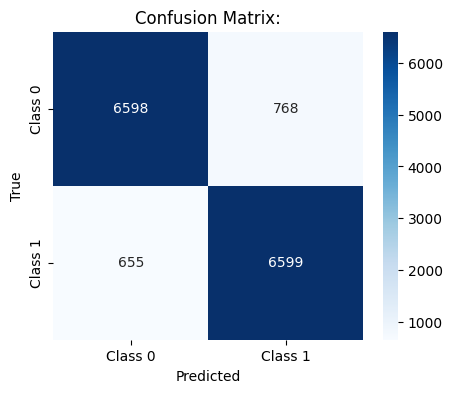

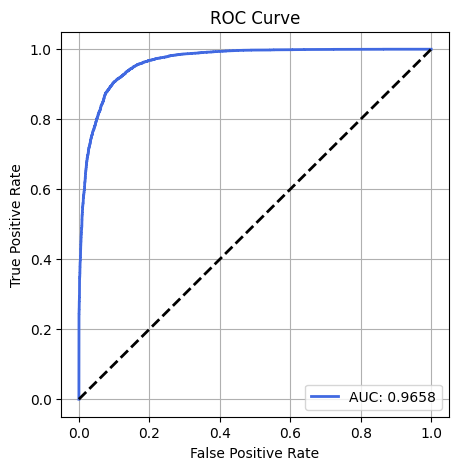



Model:DecisionTreeClassifier(class_weight='balanced', random_state=42)

               precision    recall  f1-score   support

           0       0.93      0.91      0.92      7366
           1       0.91      0.93      0.92      7254

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



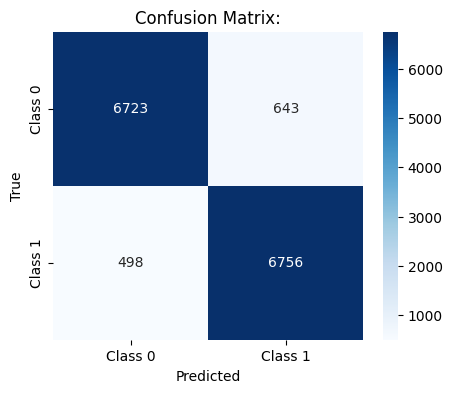

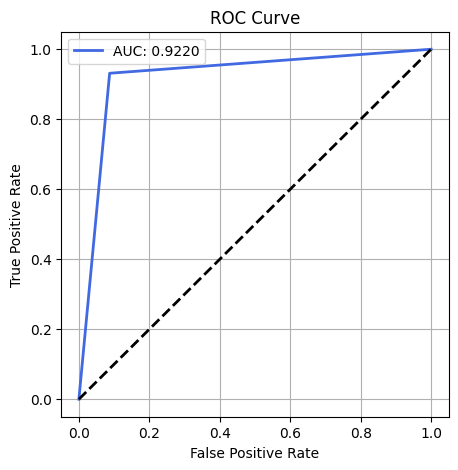



Model:RandomForestClassifier(class_weight='balanced', random_state=42)

               precision    recall  f1-score   support

           0       0.97      0.93      0.95      7366
           1       0.93      0.97      0.95      7254

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



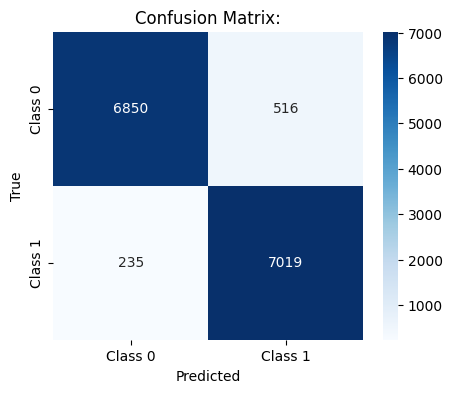

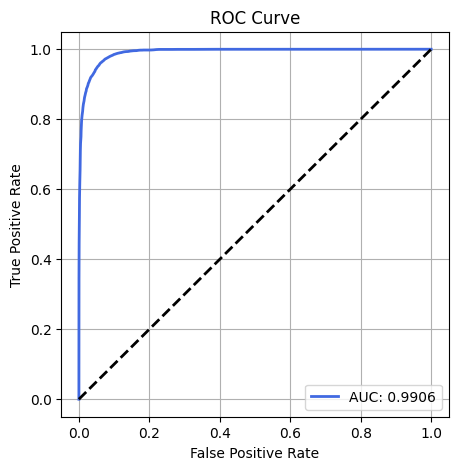

In [ ]:
# Now call the function for Model1
results1 = evaluate_func(model,X_train, X_test, y_train, y_test)

**2.XGB Classifier and LightGBM Classifier**

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

               precision    recall  f1-score   support

           0       0.95      0.95      0.95      7366
           1       0.95      0.95      0.95      7254

    accuracy                           0.95     14620
   macro avg 

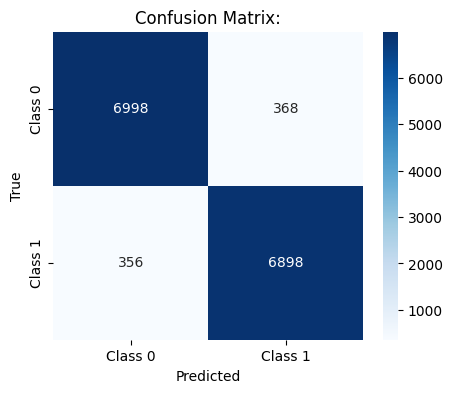

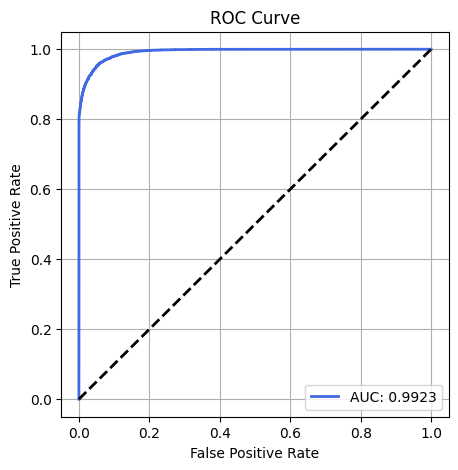



[LightGBM] [Info] Number of positive: 29294, number of negative: 29182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5983
[LightGBM] [Info] Number of data points in the train set: 58476, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500958 -> initscore=0.003831
[LightGBM] [Info] Start training from score 0.003831
Model:LGBMClassifier(random_state=42)

               precision    recall  f1-score   support

           0       0.95      0.94      0.95      7366
           1       0.94      0.95      0.95      7254

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



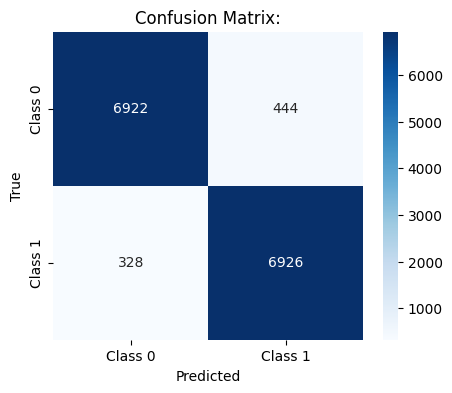

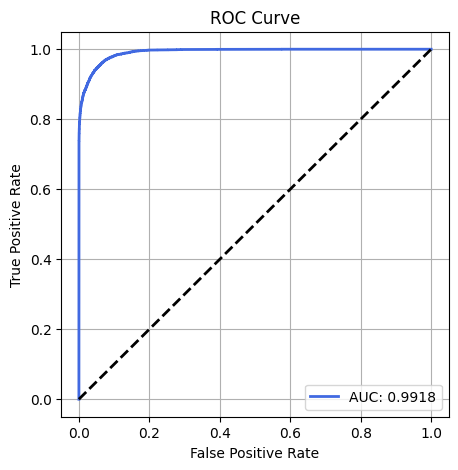

In [ ]:
# Now call the function for Model2
results2 = evaluate_func(model2,X_train.values, X_test.values, y_train.values, y_test.values)

**3.Neural Networks**

Model:MLPClassifier(max_iter=1000, random_state=42)

               precision    recall  f1-score   support

           0       0.95      0.93      0.94      7366
           1       0.93      0.95      0.94      7254

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620



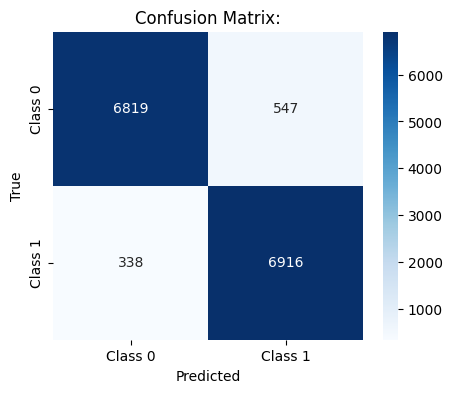

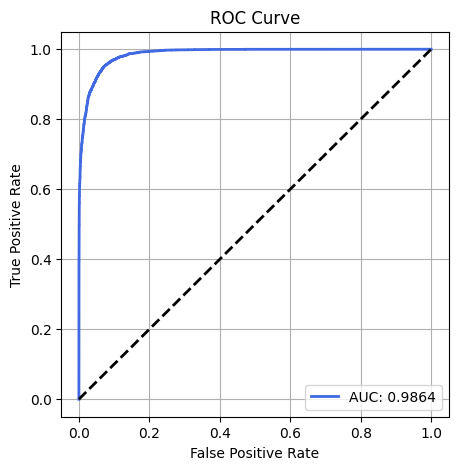

In [ ]:
# Now call the function for Model3
results3 = evaluate_func(model3,X_train, X_test, y_train, y_test)

##**Step6: Hyperparameter tuning with cross validation**

In [ ]:
# Function for Hyperparameter Tuning and Cross-Validation(RandomSearch)
def hyperparameter_tuning(model, param_grid, X_train, y_train, X_test, y_test, cv=5, n_iter=10):
    """
    Perform hyperparameter tuning using RandomizedSearchCV with cross-validation.

    Parameters:
        model: The machine learning model (e.g., LogisticRegression, DecisionTreeClassifier)
        param_grid: The hyperparameter grid for the model
        X_train, y_train: Training data
        X_test, y_test: Testing data
        cv: Number of cross-validation folds (default=5)
        n_iter: Number of parameter settings sampled in RandomizedSearchCV (default=10)

    Returns:
        best_model: Best estimator after hyperparameter tuning
        results: Dictionary containing accuracy, precision, recall, F1-score, and ROC-AUC
    """
    # Initialize RandomizedSearchCV with cross-validation
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                       cv=cv, scoring='accuracy', n_jobs=-1, verbose=2,
                                       n_iter=n_iter, random_state=42)

    # Fit the model to the training data
    random_search.fit(X_train, y_train)

    # Get the best model
    best_model = random_search.best_estimator_

    # Predict on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the model using various metrics
    results = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    }

    # Output best hyperparameters and metrics
    print(f"Best Hyperparameters: {random_search.best_params_}")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall: {results['recall']:.4f}")
    print(f"F1-Score: {results['f1_score']:.4f}")
    print(f"ROC-AUC: {results['roc_auc']:.4f}")

    return best_model, results

In [ ]:
#Avoided since taking too much time (But accuracy for models were above 90%)
# Function for Hyperparameter Tuning and Cross-Validation(GridSearch)
'''def hyperparameter_tuning(model, param_grid, X_train, y_train, X_test, y_test, cv=5):
    """
    Perform hyperparameter tuning using GridSearchCV with cross-validation.

    Parameters:
        model: The machine learning model (e.g., LogisticRegression, DecisionTreeClassifier)
        param_grid: The hyperparameter grid for the model
        X_train, y_train: Training data
        X_test, y_test: Testing data
        cv: Number of cross-validation folds (default=5)

    Returns:
        best_model: Best estimator after hyperparameter tuning
        results: Dictionary containing accuracy, precision, recall, F1-score, and ROC-AUC
    """
    # Initialize GridSearchCV with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)

    # Fit the model to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Predict on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the model using various metrics
    results = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    }

    # Output best hyperparameters and metrics
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall: {results['recall']:.4f}")
    print(f"F1-Score: {results['f1_score']:.4f}")
    print(f"ROC-AUC: {results['roc_auc']:.4f}")

    return best_model, results
'''

In [76]:
# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': ['balanced', None]
}
best_lr_model, lr_results = hyperparameter_tuning(model[0], param_grid_lr, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'solver': 'liblinear', 'class_weight': None, 'C': 1}
Accuracy: 0.9030
Precision: 0.8959
Recall: 0.9103
F1-Score: 0.9030
ROC-AUC: 0.9659


In [77]:
# Hyperparameter grid for Decision Trees

param_grid_dt = { #Removed extra space at the beginning of the line
     'max_depth': [3, 5, 7, 10],
     'min_samples_split': [2, 5, 10],
     'criterion': ['gini', 'entropy'],
     'class_weight': ['balanced', None]

}
best_dt_model, dt_results = hyperparameter_tuning(model[1], param_grid_dt, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_split': 5, 'max_depth': 7, 'criterion': 'entropy', 'class_weight': None}
Accuracy: 0.8930
Precision: 0.8689
Recall: 0.9238
F1-Score: 0.8955
ROC-AUC: 0.9575


In [78]:
# Hyperparameter grid for Random Forest

param_grid_rf = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]
}
best_rf_model, rf_results = hyperparameter_tuning(model[2], param_grid_rf, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'min_samples_split': 5, 'max_depth': 7, 'criterion': 'entropy', 'class_weight': 'balanced'}
Accuracy: 0.9038
Precision: 0.8661
Recall: 0.9535
F1-Score: 0.9077
ROC-AUC: 0.9634


In [79]:
# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

best__xgb_model, xgb_results = hyperparameter_tuning(model2[0], param_grid_xgb, X_train.values, y_train.values, X_test.values, y_test.values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Accuracy: 0.9523
Precision: 0.9505
Recall: 0.9535
F1-Score: 0.9520
ROC-AUC: 0.9929


In [80]:
# Hyperparameter grid for LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'boosting_type': ['gbdt', 'dart'],
    'subsample': [0.8, 1]
}

best_lgbm_model, lgbm_results = hyperparameter_tuning(model2[1], param_grid_lgbm, X_train.values, y_train.values, X_test.values, y_test.values)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 29294, number of negative: 29182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5983
[LightGBM] [Info] Number of data points in the train set: 58476, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500958 -> initscore=0.003831
[LightGBM] [Info] Start training from score 0.003831
Best Hyperparameters: {'subsample': 1, 'num_leaves': 50, 'n_estimators': 100, 'learning_rate': 0.2, 'boosting_type': 'gbdt'}
Accuracy: 0.9508
Precision: 0.9466
Recall: 0.9548
F1-Score: 0.9507
ROC-AUC: 0.9928


In [ ]:
param_grid_mlp = {
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}
best_mlp_model, mlp_results = hyperparameter_tuning(model3[0], param_grid_mlp, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'constant', 'activation': 'relu'}
Accuracy: 0.9395
Precision: 0.9267
Recall: 0.9534
F1-Score: 0.9399
ROC-AUC: 0.9864


##**Graphical Representation**

**1. Store the Results in a Dictionary**

In [90]:
# Store the results of all models into a dictionary
model_results = {
    'Logistic Regression': lr_results,
    'Decision Tree': dt_results,
    'Random Forest': rf_results,
    'Neural Network': mlp_results,
    'XGBoost': xgb_results,
    'LightGBM': lgbm_results
}

In [95]:
# Convert the dictionary into a DataFrame for easy plotting
results_df = pd.DataFrame(model_results).T  # Transpose for better readability
results_df.head(6)

,accuracy,precision,recall,f1_score,roc_auc
Logistic Regression,0.903010,0.895929,0.910256,0.903036,0.965862
Decision Tree,0.893023,0.868906,0.923766,0.895496,0.957531
Random Forest,0.903830,0.866141,0.953543,0.907743,0.963447
Neural Network,0.939466,0.926705,0.953405,0.939865,0.986379
XGBoost,0.952326,0.950529,0.953543,0.952034,0.992909
LightGBM,0.950821,0.946563,0.954784,0.950655,0.992767


In [ ]:
# prompt: Using dataframe results_df: why mlp_results not displayed

# The provided dataframe information (results_df) does not contain any information about an "mlp_results" variable.
# It appears that the mlp_results variable is not part of the data being used, so it cannot be displayed.
# To display mlp_results, the dataframe would need to contain this information, or the code would need to be adjusted to load it.


**2. Plotting the Comparative Analysis Graph**

<Figure size 1400x800 with 0 Axes>

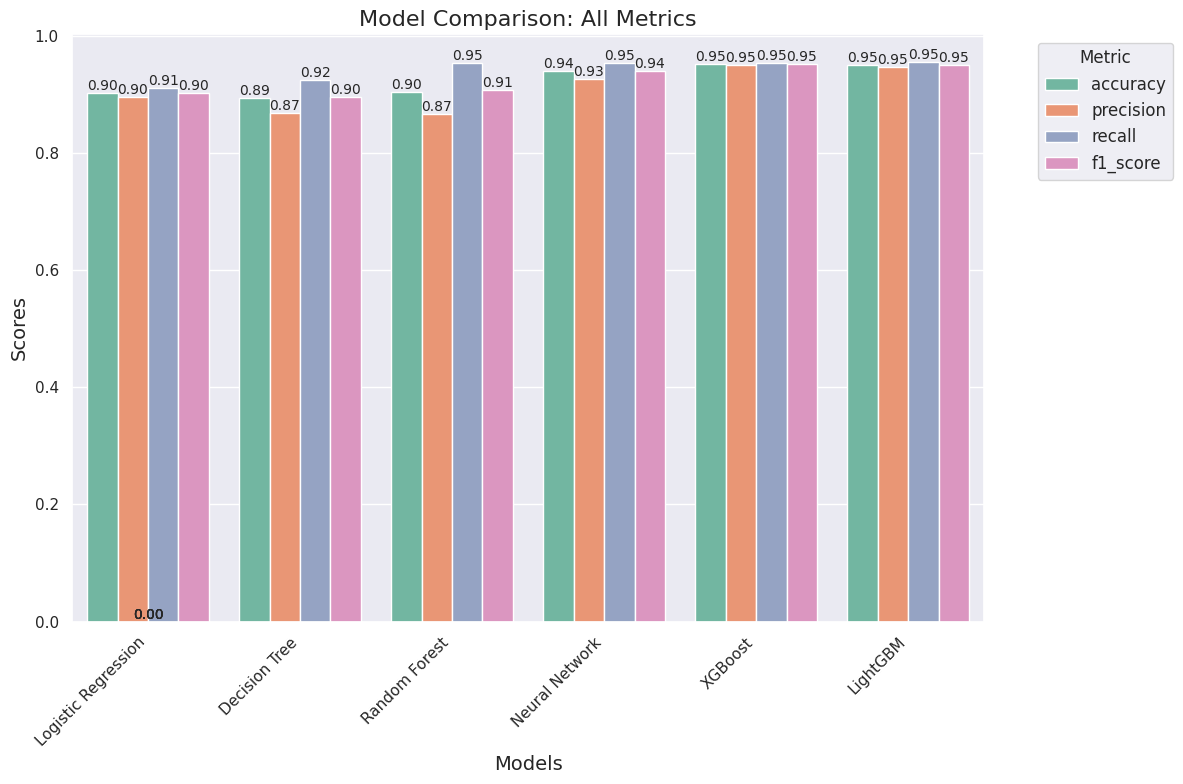

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the size and style of the plot
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")  # Use a dark grid background

# Create a new figure for the barplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the metrics
metrics = ['accuracy', 'precision', 'recall', 'f1_score']  # Adjust this if you have different metric names
results_melted = results_df[metrics].reset_index().melt(id_vars='index', value_vars=metrics, var_name='Metric', value_name='Score')

# Create a grouped barplot with a different color palette (Set2)
ax = sns.barplot(x='index', y='Score', hue='Metric', data=results_melted, palette='Set2')

# Customize the plot
plt.title("Model Comparison: All Metrics", fontsize=16)
plt.ylabel("Scores", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add value annotations to each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Move the legend outside the plot
plt.legend(title='Metric', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Optimize layout and show the plot
plt.tight_layout()
plt.show()


- **XGBoost,LightGBM and MLP Classifier** are the top performers with uniform and high scores across all metrics. These models should be your go-to for this task.
- **Logistic Regression** is underperforming, especially in terms of precision, indicating it may not be suitable for this specific problem.
- **Random Forest** remains competitive and provides good overall performance, though not as high as XGBoost or LightGBM.

##**Step7: Interpretation**

**1. Logistic Regression: Coefficients Interpretation**

            Feature  Coefficient  Abs_Coefficient
8         euribor3m     3.070324         3.070324
25      education_6     2.825733         2.825733
24      education_5     2.694175         2.694175
46  day_of_week_cos    -2.616685         2.616685
22      education_3     2.446969         2.446969
9       nr_employed    -2.347774         2.347774
5      emp_var_rate    -2.239443         2.239443
26      education_7     2.185988         2.185988
21      education_2     2.123097         2.123097
20      education_1     2.048268         2.048268


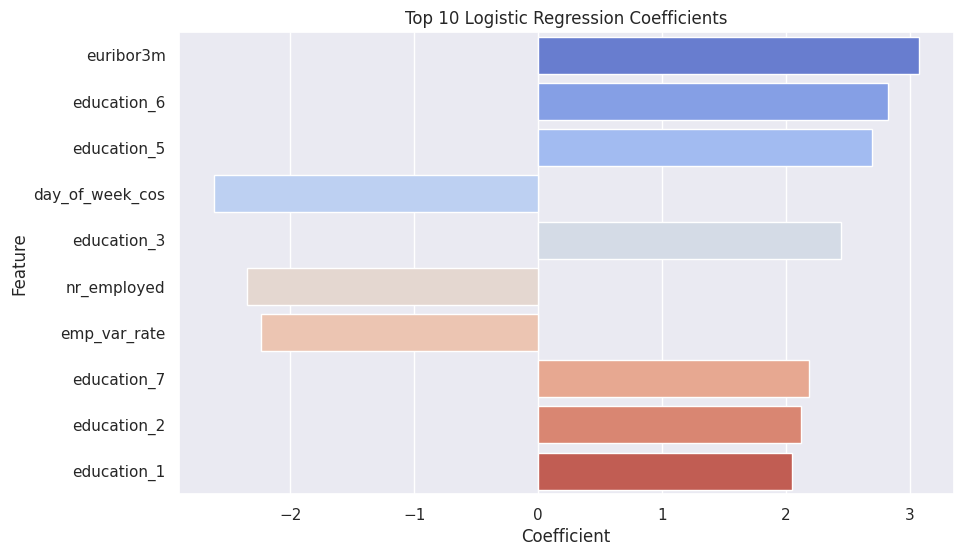

In [97]:
#Code to Extract and Interpret Coefficients:
# Assuming 'lr_model' is your trained LogisticRegression model
coefficients = logreg_cv.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to show coefficients and feature names
lr_coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by the absolute value of the coefficients to see the most influential features
lr_coeff_df['Abs_Coefficient'] = np.abs(lr_coeff_df['Coefficient'])
lr_coeff_df = lr_coeff_df.sort_values('Abs_Coefficient', ascending=False)

# Display the top features
print(lr_coeff_df.head(10))

# Plot top 10 coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=lr_coeff_df.head(10), palette="coolwarm")
plt.title('Top 10 Logistic Regression Coefficients')
plt.show()


**2. Decision Tree, Random Forest, XGBoost, LightGBM: Feature Importance**

                 Feature  Decision Tree  Random Forest   XGBoost  LightGBM
34              duration       0.007695       0.107951  0.000000         0
1               duration       0.239400       0.090988  0.108779       172
39        duration pdays       0.025755       0.089819  0.012922        79
8              euribor3m       0.042483       0.077755  0.017230       240
9            nr_employed       0.165706       0.069204  0.243006        61
37            duration^2       0.157500       0.067341  0.065284       163
32  duration_nr_employed       0.025568       0.057605  0.010060       111
5           emp_var_rate       0.012400       0.041043  0.028382        91
7          cons_conf_idx       0.074592       0.030361  0.056720        79
38     duration campaign       0.016387       0.026088  0.003068        73


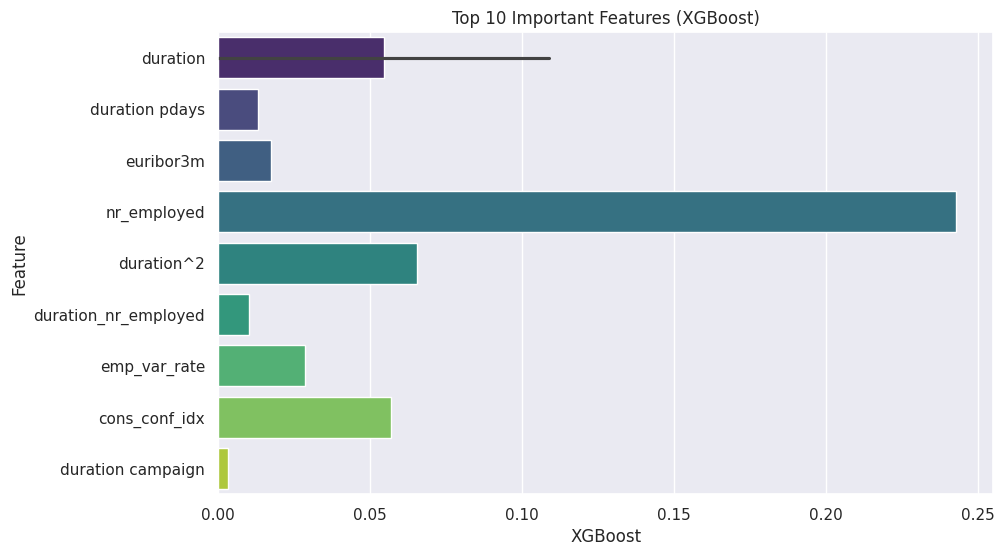

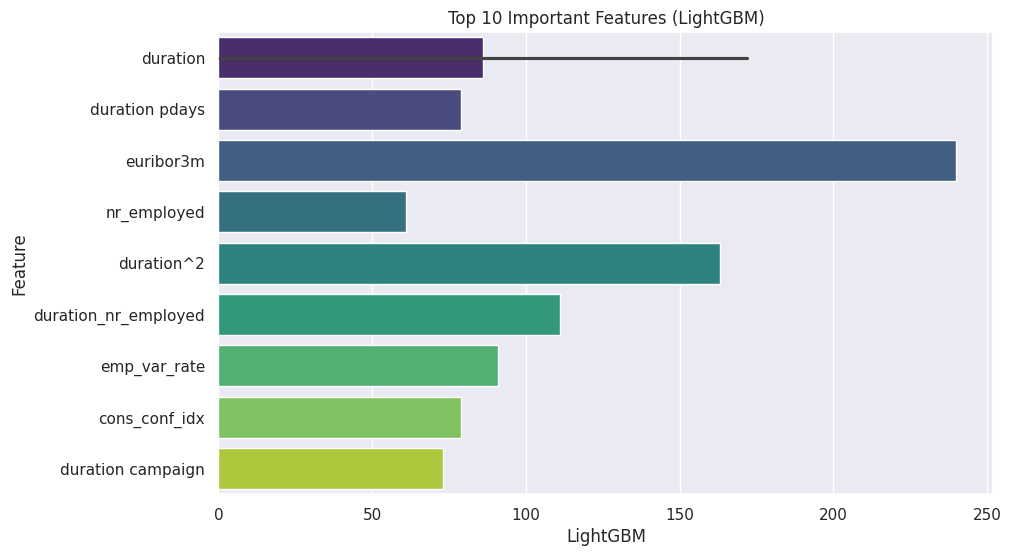

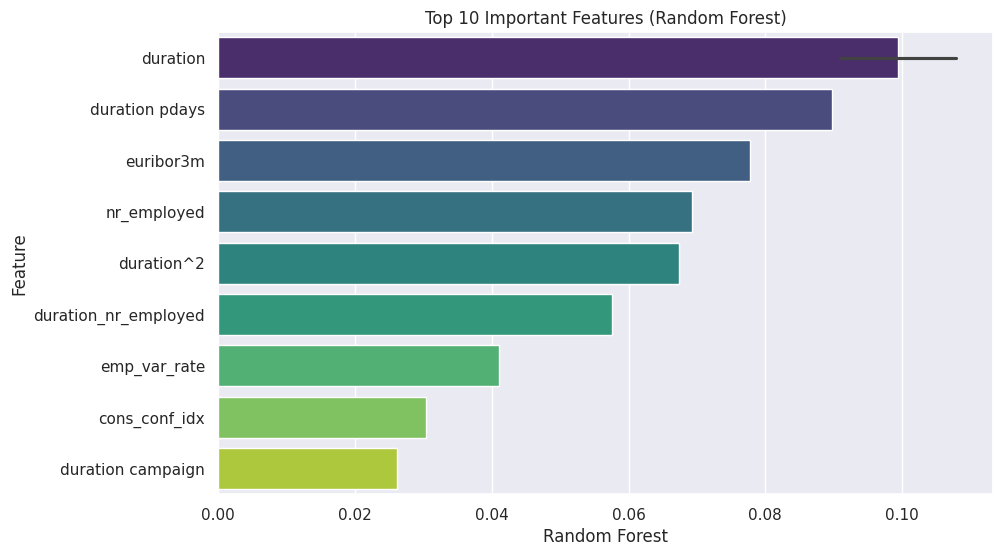

In [101]:
#Code to Extract Feature Importance:
# Assuming 'dt_model', 'rf_model', 'xgb_model', 'lgbm_model' are your trained models

# Feature importance for Decision Tree
dt_importance = dt_cv.feature_importances_

# Feature importance for Random Forest
rf_importance = rand_class.feature_importances_

# Feature importance for XGBoost
xgb_importance = xgm_class.feature_importances_

# Feature importance for LightGBM
lgbm_importance = lbm_class.feature_importances_

# Combine them into a DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Decision Tree': dt_importance,
    'Random Forest': rf_importance,
    'XGBoost': xgb_importance,
    'LightGBM': lgbm_importance
})

# Sort by importance for Random Forest as an example
importance_df = importance_df.sort_values(by='Random Forest', ascending=False)

# Display top 10 features for Random Forest
print(importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='XGBoost', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features (XGBoost)')
plt.show()

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='LightGBM', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features (LightGBM)')
plt.show()

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Random Forest', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features (Random Forest)')
plt.show()

**3. Neural Networks: Permutation Importance**

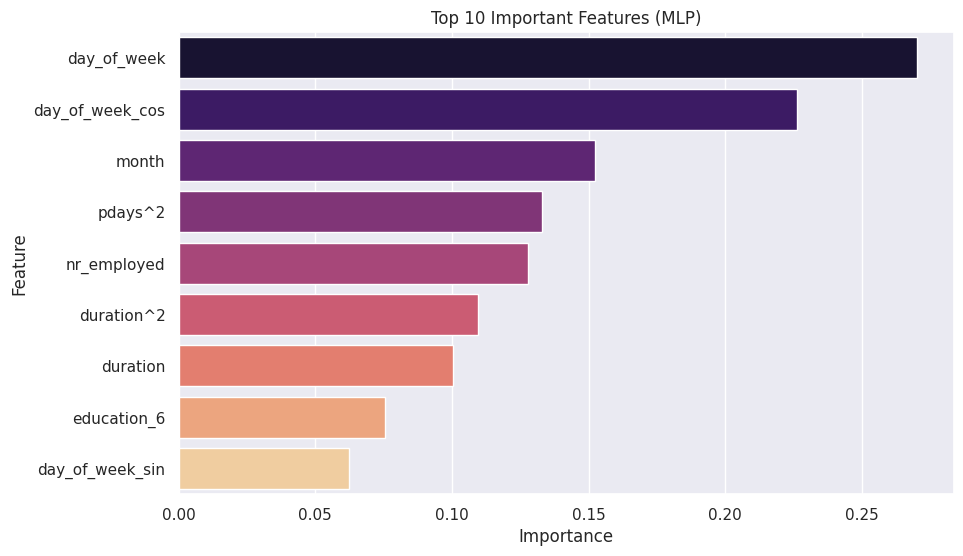

In [102]:
#Code for Permutation Importance:
from sklearn.inspection import permutation_importance

# For Neural Network (MLP)
mlp_perm_importance = permutation_importance(neural_net, X_test, y_test, n_repeats=10, random_state=42)

# Create DataFrame for neural network importance
mlp_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': mlp_perm_importance.importances_mean})
mlp_importance_df = mlp_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 important features for MLP
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=mlp_importance_df.head(10), palette='magma')
plt.title('Top 10 Important Features (MLP)')
plt.show()

##**Step8: Deployment**

In [ ]:
import xgboost as xgb

In [ ]:
# Define the features you want to include
# Verify the columns exist in df_resampled DataFrame.
# You can print(df_resampled.columns) to list all columns
#This was used for Top 10 features
#features = ['euribor3m', 'nr_employed', 'duration^2', 'duration_nr_employed', 'emp_var_rate', 'cons_conf_idx', 'duration campaign']
'''features = ['euribor3m', 'nr_employed', 'duration^2', 'duration_nr_employed', 'emp_var_rate', 'cons_conf_idx', 'duration campaign','job', 'housing', 'loan', 'contact', 'month',
    'day_of_week']

# Define features (X) and target (y) from the resampled dataset
X_resampled = df_resampled[features] # Use df_resampled to select features
y_resampled = df_resampled['y']'''

In [ ]:
#Using all 47 features
X_resampled = df_resampled.drop('y', axis=1)
y_resampled = df_resampled['y']

In [ ]:
# Load dataset and split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58476, 47), (14620, 47), (58476,), (14620,))

In [ ]:
X_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome',
       'marital_1', 'marital_2', 'marital_3', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'education_6',
       'education_7', 'default_1', 'default_2', 'previous_1', 'previous_2',
       'previous_3', 'duration_nr_employed', 'campaign_pdays', 'duration',
       'campaign', 'pdays', 'duration^2', 'duration campaign',
       'duration pdays', 'campaign^2', 'campaign pdays', 'pdays^2',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos'],
      dtype='object')

In [ ]:
# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,class_weight='balanced')

In [ ]:
# Define the parameter grid
param_grid = {
      'n_estimators': [100, 200],
      'max_depth': [3, 5, 7],
      'learning_rate': [0.01, 0.1, 0.2],
      'subsample': [0.8, 1],
      'colsample_bytree': [0.8, 1]
}

In [ ]:
# Import the necessary library
from sklearn.model_selection import RandomizedSearchCV

# Setup the GridSearchCV
# Use RandomizedSearchCV instead of RandomSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Convert X_train to a NumPy array
X_train_array = X_train.values

# Fit the model using the NumPy array
random_search.fit(X_train_array, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           class_weight='balanced',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_c...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1]},
                   scoring='accuracy', verbose=1)

In [ ]:
# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1}
Best Score: 0.9512278696041487


In [ ]:
import joblib
# Save the best model to a file
best_model = random_search.best_estimator_
joblib.dump(best_model, 'xgb_best_model_main.pkl')

['xgb_best_model_main.pkl']

In [ ]:
import pickle
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the trained model
with open('xgb_best_model_main.pkl', 'rb') as f:
    model = pickle.load(f)

# Get the feature importance scores (by gain)
feature_importance = model.get_booster().get_score(importance_type='gain')

# Sort the features by importance
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1])

# Display the sorted feature importance
for feature, score in sorted_features:
    print(f"Feature: {feature}, Importance Score: {score}")


Feature: f29, Importance Score: 2.7088727951049805
Feature: f23, Importance Score: 3.365941047668457
Feature: f38, Importance Score: 3.979231595993042
Feature: f10, Importance Score: 4.015398979187012
Feature: f0, Importance Score: 5.00144100189209
Feature: f19, Importance Score: 5.435946941375732
Feature: f14, Importance Score: 6.574717044830322
Feature: f11, Importance Score: 6.842013835906982
Feature: f27, Importance Score: 7.764657974243164
Feature: f4, Importance Score: 8.240154266357422
Feature: f42, Importance Score: 8.250285148620605
Feature: f32, Importance Score: 8.817441940307617
Feature: f16, Importance Score: 9.713166236877441
Feature: f12, Importance Score: 9.922436714172363
Feature: f3, Importance Score: 11.690499305725098
Feature: f39, Importance Score: 12.280659675598145
Feature: f6, Importance Score: 13.38908863067627
Feature: f8, Importance Score: 13.456844329833984
Feature: f15, Importance Score: 13.873132705688477
Feature: f20, Importance Score: 14.526577949523926


In [ ]:
# Get feature names
feature_names = X_train.columns

# Create a dictionary to map index to feature name
feature_importance = {
    'f29': 1.5971739292144775,
    'f38': 2.4508588314056396,
    'f10': 2.6369452476501465,
    'f23': 2.864417314529419,
    'f0': 3.040741443634033,
    'f19': 3.9476137161254883,
    'f14': 4.007565021514893,
    'f11': 4.026761054992676,
    'f27': 4.343288898468018,
    'f32': 4.661611080169678,
    'f4': 4.997368335723877,
    'f42': 5.117236614227295,
    'f12': 5.8137431144714355,
    'f39': 5.924004077911377,
    'f16': 6.264383316040039,
    'f8': 7.429755687713623,
    'f6': 7.973193645477295,
    'f45': 8.638628005981445,
    'f15': 8.662762641906738,
    'f3': 8.793510437011719,
    'f46': 9.372171401977539,
    'f44': 9.420668601989746,
    'f20': 9.645983695983887,
    'f33': 10.480956077575684,
    'f22': 10.690062522888184,
    'f31': 10.741890907287598,
    'f25': 11.1117525100708,
    'f24': 11.679889678955078,
    'f21': 12.486030578613281,
    'f26': 12.763586044311523,
    'f43': 13.290695190429688,
    'f18': 13.542932510375977,
    'f17': 13.694262504577637,
    'f13': 16.266077041625977,
    'f2': 17.29873275756836,
    'f40': 19.476787567138672,
    'f5': 21.931745529174805,
    'f7': 31.53902244567871,
    'f37': 35.04424285888672,
    'f1': 51.4303092956543,
    'f9': 216.9058837890625
}


# Print feature names and their importance
for idx, importance in feature_importance.items():
    feature_idx = int(idx[1:])  # Extract the index number from 'fX'
    feature_name = feature_names[feature_idx]  # Get the feature name from the DataFrame
    print(f"{feature_name}-----> {importance}")

previous_1-----> 1.5971739292144775
duration campaign-----> 2.4508588314056396
job-----> 2.6369452476501465
education_4-----> 2.864417314529419
age-----> 3.040741443634033
marital_3-----> 3.9476137161254883
month-----> 4.007565021514893
housing-----> 4.026761054992676
default_1-----> 4.343288898468018
duration_nr_employed-----> 4.661611080169678
previous-----> 4.997368335723877
pdays^2-----> 5.117236614227295
loan-----> 5.8137431144714355
duration pdays-----> 5.924004077911377
poutcome-----> 6.264383316040039
euribor3m-----> 7.429755687713623
cons_price_idx-----> 7.973193645477295
day_of_week_sin-----> 8.638628005981445
day_of_week-----> 8.662762641906738
pdays-----> 8.793510437011719
day_of_week_cos-----> 9.372171401977539
month_cos-----> 9.420668601989746
education_1-----> 9.645983695983887
campaign_pdays-----> 10.480956077575684
education_3-----> 10.690062522888184
previous_3-----> 10.741890907287598
education_6-----> 11.1117525100708
education_5-----> 11.679889678955078
education_2

#**Conclusion**
**Key Takeaways:**
- The **XGBoost model** developed provides an effective tool for predicting whether a client will subscribe to a term deposit based on a range of features.
- **Duration** of the client interaction emerged as the most significant predictor, indicating that longer calls often correlate with successful subscription.
- Economic indicators such as **euribor3m (interest rates)** and **nr_employed (employment levels)** were also important in determining the likelihood of subscription.

**Deployment:**
The model has been deployed through a real-time prediction system using the Streamlit framework, allowing for seamless and interactive usage.